In [9]:
import pandas as pd
import os
from tqdm import tqdm
import argparse
import yaml
import matplotlib.pyplot as plt
import tifffile
import seaborn as sns
import bokeh

from utils import *
bokeh.io.output_notebook()

Loading BokehJS ...

In [10]:
# General info dataframe
filepath_measurements_info = "/Volumes/cytokinesis-zebrafish-collab/magnetic_tweezers_SD/2_analysis/sd_tweezers_info_1.csv"
results_dir = '/Volumes/cytokinesis-zebrafish-collab/magnetic_tweezers_SD/3_plots/'

df_general_info = pd.read_csv(filepath_measurements_info, delimiter=';', encoding='utf-8')
df_general_info.head()

trackmate_file MTs  first_pulse (frame)  \
0  /Volumes/cytokinesis-zebrafish-collab/magnetic...   n                  131   
1  /Volumes/cytokinesis-zebrafish-collab/magnetic...   n                  169   
2  /Volumes/cytokinesis-zebrafish-collab/magnetic...   y                   13   
3  /Volumes/cytokinesis-zebrafish-collab/magnetic...   n                   11   
4  /Volumes/cytokinesis-zebrafish-collab/magnetic...   y                   11   

   last_pulse_start (frame)  t_on (frame)  t_off (frame)  tip_x  tip_y  \
0                       251            10             30     98    378   
1                       249            10             30     98    378   
2                       653            10             30     53    314   
3                       611            10             30     57    360   
4                       531            10             30     82    254   

   calibration (mV)                       bead_type  time_interval (s)  \
0              1000  2.8 um myc dyna passivated PEG                0.5   
1              1000  2.8 um myc dyna passivated PEG                0.5   
2              1000  2.8 um myc dyna passivated PEG                0.5   
3              1000  2.8 um myc dyna passivated PEG                0.5   
4              1000  2.8 um myc dyna passivated PEG                0.5   

                                comments  
0                                    NaN  
1                                    NaN  
2                                    NaN  
3  one bead stuck during pulses 7,8,9,10  
4                                    NaN

In [11]:
def get_fit_jeff_full(xfit, xdata, ydata, F_0, t_1, sigma=None) -> np.ndarray:
    est_eta_2 = F_0 * t_1 / (np.max(ydata)-np.mean(ydata)) 

    print('estimate of eta2: ', est_eta_2)
    jeff_full_for_fit = lambda t, k, eta_1, eta_2: jeff_full(t, k, eta_1, eta_2, F_0, t_1)
    
    popt, pcov = curve_fit(jeff_full_for_fit, xdata, ydata, p0=[10, 10, 10], bounds=([0, 0, 0], [np.inf, np.inf, np.inf]), sigma=sigma)

    yfit = jeff_full_for_fit(xfit, *popt)
    return yfit, popt, pcov

def r_squared(ydata, yfit):
    ss_res = np.sum((ydata - yfit) ** 2)
    ss_tot = np.sum((ydata - np.mean(ydata)) ** 2)
    R_sq = 1- ss_res/ss_tot
    return R_sq
     

20240523_s02p01t01_1_5sON_15sOFF_spots
estimate of eta2:  116.06089484297323
k: 10.294033190575119 +/- 0.2501496485490529
eta_1: 19.945782768079177 +/- 0.8188152457899994
eta_2: 7.349295256495481 +/- 0.14934504662142165
10.294033190575119 19.945782768079177 7.349295256495481


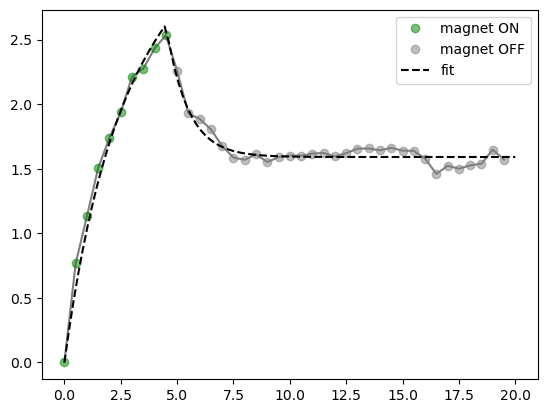

estimate of eta2:  122.72498231291964
k: 12.597810828916291 +/- 0.4362570507657784
eta_1: 27.367187852009536 +/- 1.5655324117475442
eta_2: 14.746488817336132 +/- 0.5085634956470148
12.597810828916291 27.367187852009536 14.746488817336132


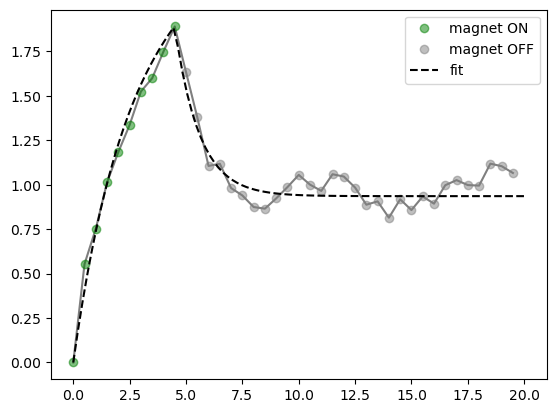

estimate of eta2:  130.9266195496193
k: 16.68077684893615 +/- 0.5237558874024086
eta_1: 43.694505474685066 +/- 2.168742822591912
eta_2: 128.79109522245744 +/- 14.282358851038937
16.68077684893615 43.694505474685066 128.79109522245744


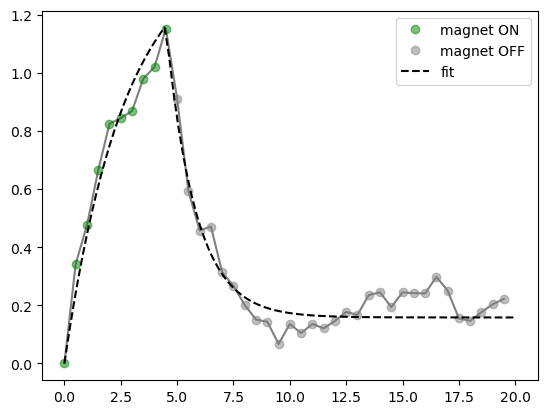

estimate of eta2:  110.70899527285063
k: 8.462965874100721 +/- 0.30390341439552615
eta_1: 23.75847078230213 +/- 1.018923572059999
eta_2: 6.35585453952757 +/- 0.1635241133553384
8.462965874100721 23.75847078230213 6.35585453952757


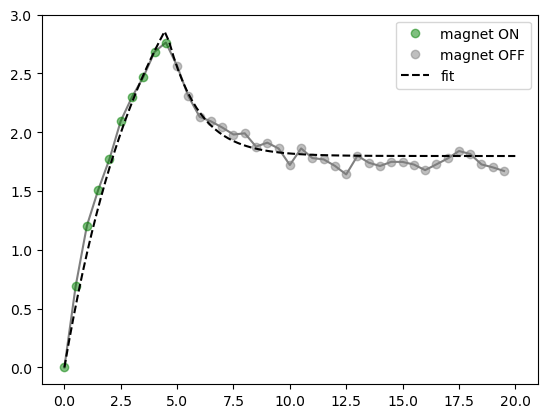

estimate of eta2:  121.87557188905605
k: 12.469963483578377 +/- 0.6611996195129912
eta_1: 31.040451074053404 +/- 2.3027876968322514
eta_2: 11.353667684654352 +/- 0.5022984916164581
12.469963483578377 31.040451074053404 11.353667684654352


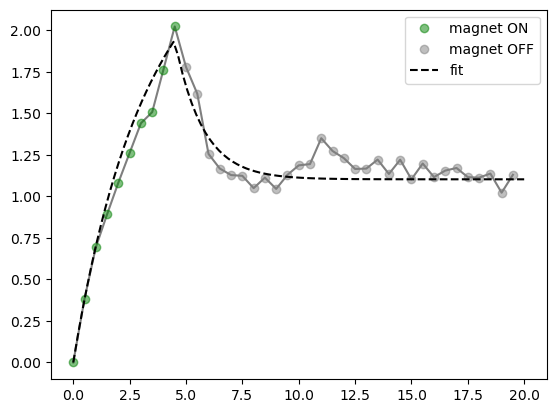

estimate of eta2:  117.2960261935203
k: 8.588933108049458 +/- 0.41354433870704504
eta_1: 15.818930370686854 +/- 0.9485108539422107
eta_2: 1.9263170050309477 +/- 0.045298385666862485
8.588933108049458 15.818930370686854 1.9263170050309477


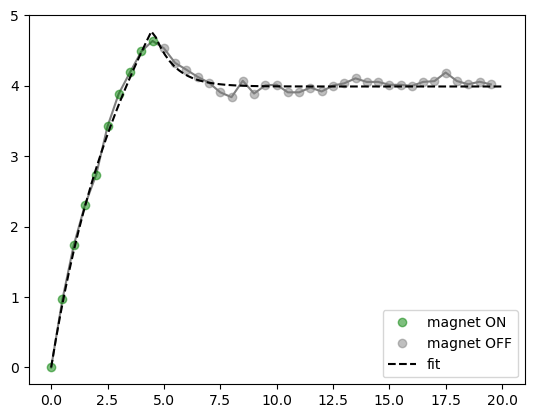

estimate of eta2:  95.9663519011482
k: 7.48093445210719 +/- 0.29740647558546535
eta_1: 20.727891535119785 +/- 1.075256607538753
eta_2: 8.516754041644878 +/- 0.3018821720504398
7.48093445210719 20.727891535119785 8.516754041644878


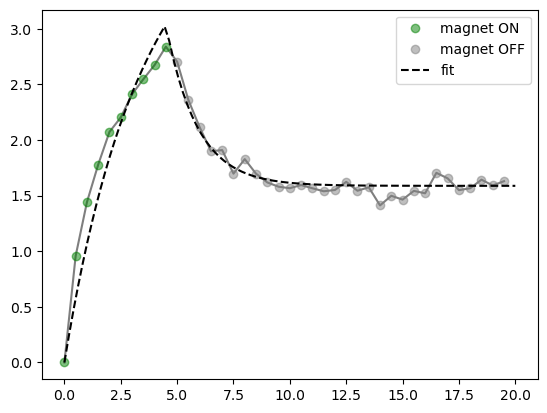

estimate of eta2:  84.98792134745443
k: 6.1715852035874255 +/- 0.22176016666952428
eta_1: 23.634880974983755 +/- 0.7690698998886245
eta_2: 6.353023003511145 +/- 0.1647943228941144
6.1715852035874255 23.634880974983755 6.353023003511145


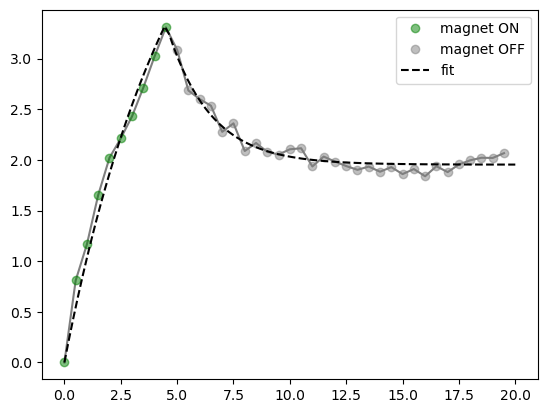

estimate of eta2:  137.72347941698382
k: 10.056590796118384 +/- 0.47674888966478
eta_1: 37.55177304221556 +/- 1.7756927687016988
eta_2: 15.406771424377848 +/- 0.6724559377381465
10.056590796118384 37.55177304221556 15.406771424377848


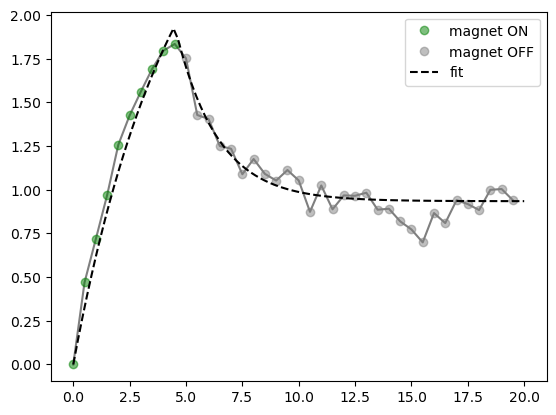

estimate of eta2:  165.1339238118959
k: 17.16399502914774 +/- 3.6575864537923555
eta_1: 14.390331392041736 +/- 6.32974051760956
eta_2: 2.2506697356307086 +/- 0.19838426572991164
17.16399502914774 14.390331392041736 2.2506697356307086
estimate of eta2:  123.29569767182937
k: 12.39017599354464 +/- 0.4673847100099009
eta_1: 35.41729728564855 +/- 1.8428180300376371
eta_2: 29.833560338494554 +/- 1.5385201702431797
12.39017599354464 35.41729728564855 29.833560338494554


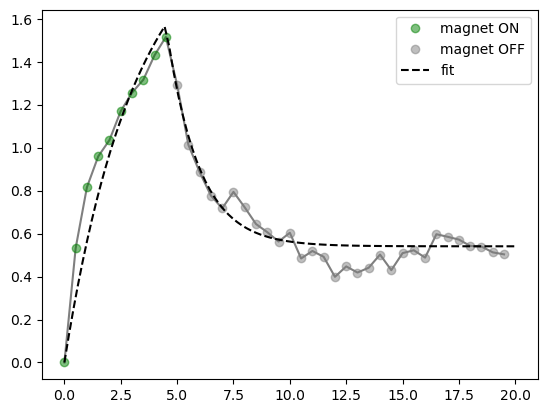

estimate of eta2:  114.37895682508523
k: 10.385120574446768 +/- 0.3019252580058753
eta_1: 41.66579917580405 +/- 1.205801390143234
eta_2: 27.71372303312231 +/- 1.0284713384960424
10.385120574446768 41.66579917580405 27.71372303312231


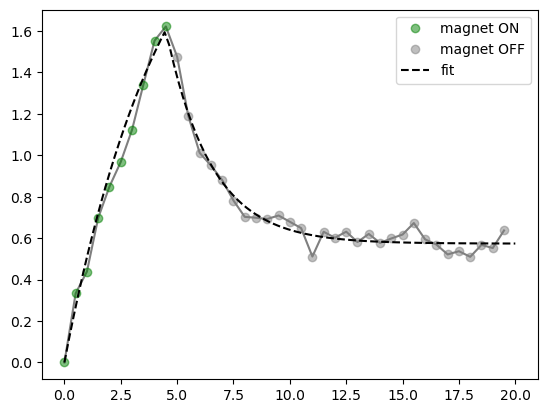

estimate of eta2:  131.37383322253754
k: 9.921667443445967 +/- 0.3226584297956006
eta_1: 33.29815010345856 +/- 1.1193988680865639
eta_2: 9.673347434908726 +/- 0.23086825269363043
9.921667443445967 33.29815010345856 9.673347434908726


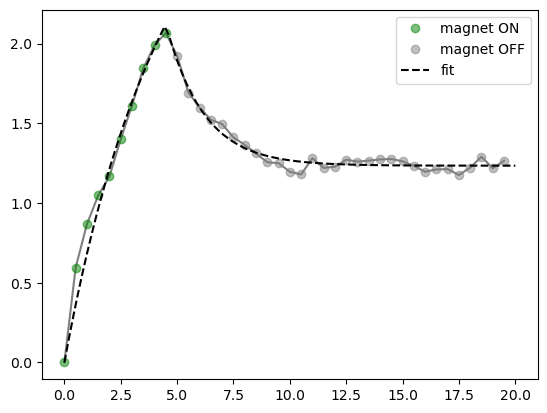

estimate of eta2:  166.5545555690839
k: 16.29705830875608 +/- 0.46551172378005756
eta_1: 42.52882130004624 +/- 1.76607423305751
eta_2: 28.0274823983305 +/- 0.9100646467901589
16.29705830875608 42.52882130004624 28.0274823983305


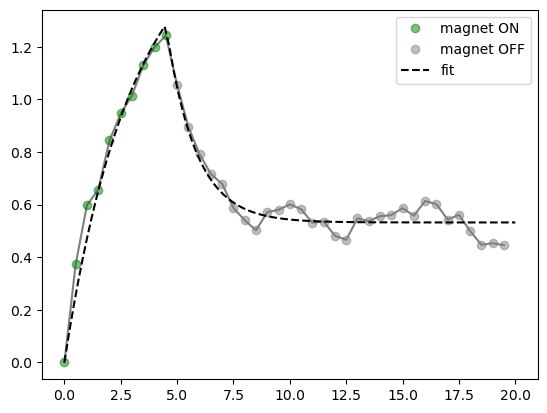

estimate of eta2:  129.48914880782036
k: 11.873920731275826 +/- 0.36079060053874296
eta_1: 38.2576272445138 +/- 1.3587461298786745
eta_2: 19.02821012766252 +/- 0.5757818455252687
11.873920731275826 38.2576272445138 19.02821012766252


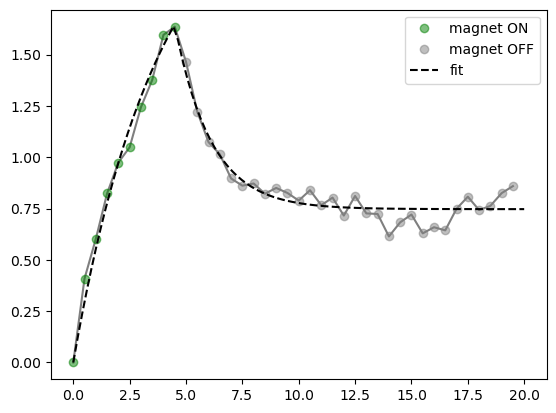

estimate of eta2:  119.31094262657528
k: 9.973570144305905 +/- 0.5926220827578246
eta_1: 41.79998332472857 +/- 2.436789233790469
eta_2: 33.98076868523115 +/- 3.039826360086936
9.973570144305905 41.79998332472857 33.98076868523115
estimate of eta2:  97.24251234237232
k: 13.006083534163933 +/- 0.745080086451707
eta_1: 47.83263968832997 +/- 4.342779294488083
eta_2: 526836318.442019 +/- 1.2966661232690931e-14
13.006083534163933 47.83263968832997 526836318.442019
estimate of eta2:  145.66999373420714
k: 14.70438654699178 +/- 0.6759938995716845
eta_1: 22.416624259159004 +/- 2.215829036741757
eta_2: 13.983641301377327 +/- 0.6520422848691159
14.70438654699178 22.416624259159004 13.983641301377327
estimate of eta2:  224.97774145877835
k: 19.034726253106506 +/- 1.0775302188499025
eta_1: 41.749960625548105 +/- 3.4153439698829446
eta_2: 11.25528933254501 +/- 0.4576702733765762
19.034726253106506 41.749960625548105 11.25528933254501


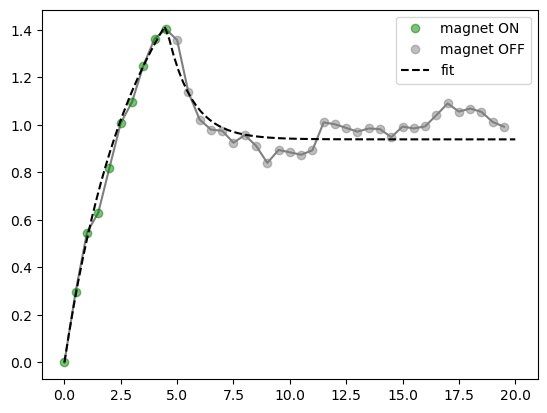

estimate of eta2:  130.5655214682368
k: 11.575767756520113 +/- 0.28306912261193684
eta_1: 49.843301693707325 +/- 1.2216285819855643
eta_2: 61.88510610405154 +/- 3.23917111039745
11.575767756520113 49.843301693707325 61.88510610405154


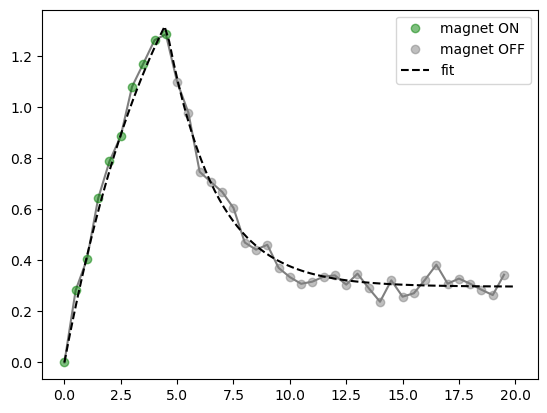

estimate of eta2:  134.12624893799205
k: 12.888523366634413 +/- 0.23035077332199214
eta_1: 40.46356065251103 +/- 0.8825930436661686
eta_2: 23.30041028876275 +/- 0.4532236496841044
12.888523366634413 40.46356065251103 23.30041028876275


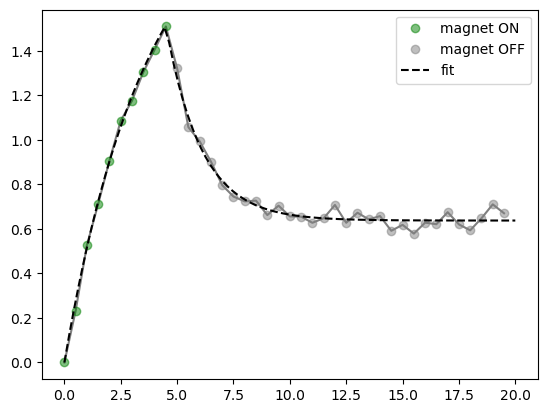

estimate of eta2:  110.86804056569889
k: 9.756342437212307 +/- 0.27503853839158243
eta_1: 35.997559597522994 +/- 1.1301637175100858
eta_2: 32.33710238141629 +/- 1.4237061558965858
9.756342437212307 35.997559597522994 32.33710238141629


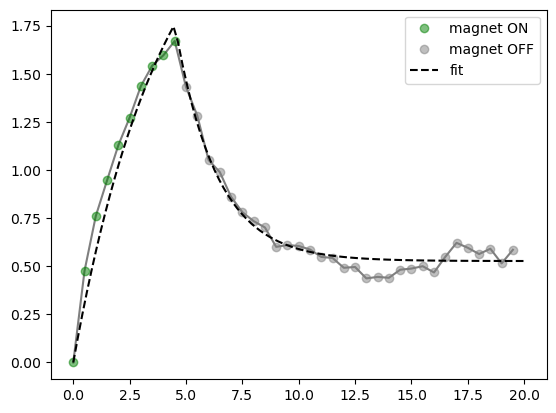

estimate of eta2:  150.72211876303757
k: 12.260546858805863 +/- 0.6738345068362521
eta_1: 49.77624430356098 +/- 2.6047547122771424
eta_2: 25.94362109613227 +/- 1.5364525625020664
12.260546858805863 49.77624430356098 25.94362109613227
estimate of eta2:  168.65133534042275
k: 16.64152338479882 +/- 0.6666233463592778
eta_1: 28.499343200981983 +/- 1.9358776659047243
eta_2: 7.844038792492132 +/- 0.2299921339594023
16.64152338479882 28.499343200981983 7.844038792492132


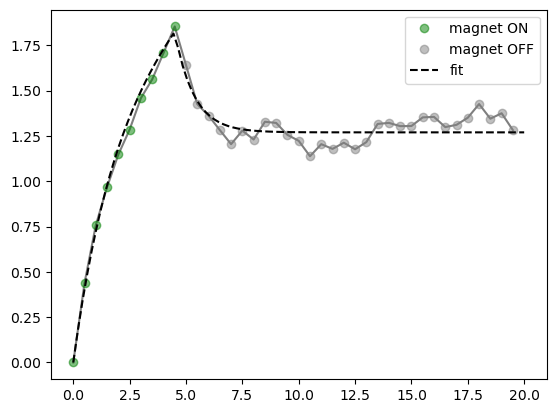

estimate of eta2:  101.38943266518524
k: 8.058334166537344 +/- 0.3427455359060241
eta_1: 43.53468487427065 +/- 1.336091564975121
eta_2: 23.08102840155628 +/- 1.1417151585204888
8.058334166537344 43.53468487427065 23.08102840155628


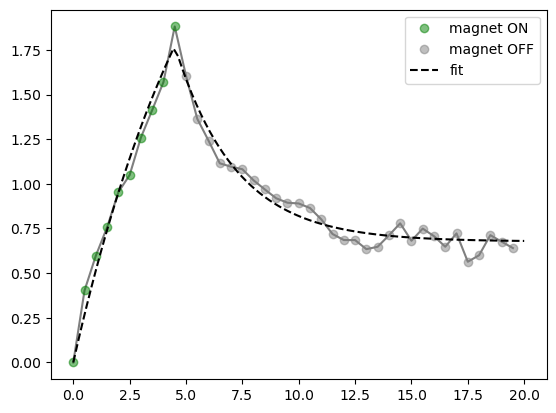

estimate of eta2:  126.51904903803396
k: 11.005242777426128 +/- 0.38745233393329515
eta_1: 41.477997033187954 +/- 1.4032280657020288
eta_2: 14.67553337299752 +/- 0.4287306481855687
11.005242777426128 41.477997033187954 14.67553337299752


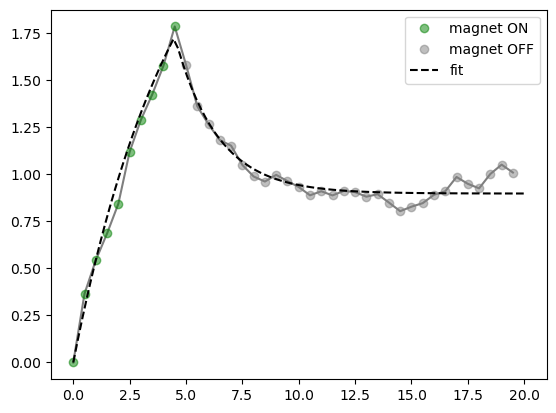

estimate of eta2:  109.43913052198188
k: 11.72494154547571 +/- 0.27315297396383786
eta_1: 40.26924814551047 +/- 1.1607743319924362
eta_2: 60.66469744152408 +/- 3.2386881728303623
11.72494154547571 40.26924814551047 60.66469744152408


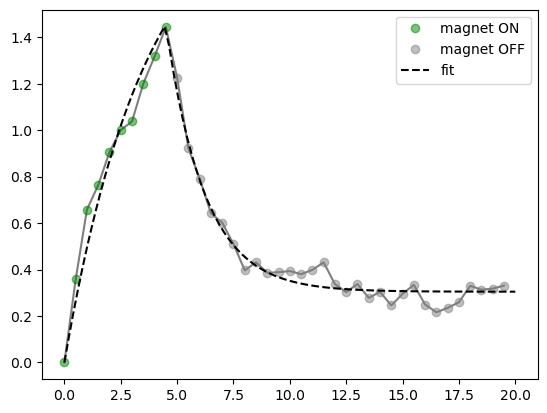

estimate of eta2:  108.42401610772463
k: 8.815094348579573 +/- 0.2761751900998157
eta_1: 27.28712186583405 +/- 0.9567074982723462
eta_2: 8.236948517636625 +/- 0.19273258658610934
8.815094348579573 27.28712186583405 8.236948517636625


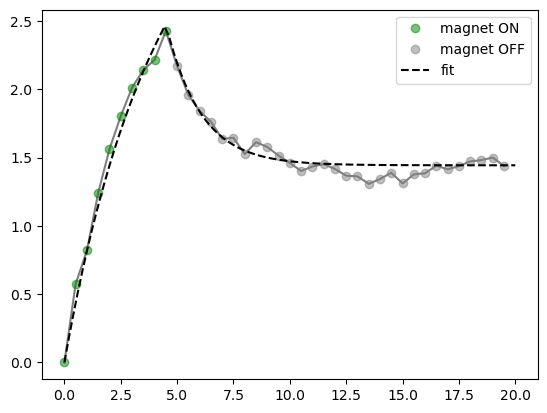

estimate of eta2:  76.46580818445612
k: 6.089469598793117 +/- 0.12548126420455763
eta_1: 21.675165932407197 +/- 0.433430466121711
eta_2: 5.982963424478053 +/- 0.08814500534349456
6.089469598793117 21.675165932407197 5.982963424478053


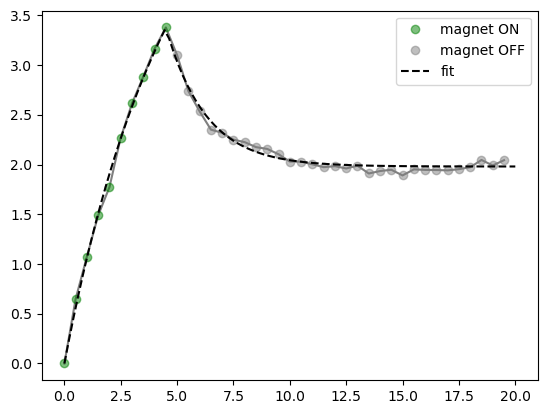

estimate of eta2:  86.01211377185626
k: 6.300603467790439 +/- 0.325886194465361
eta_1: 37.87712776627105 +/- 1.4978695666686626
eta_2: 83.26496613383515 +/- 17.178082794790996
6.300603467790439 37.87712776627105 83.26496613383515


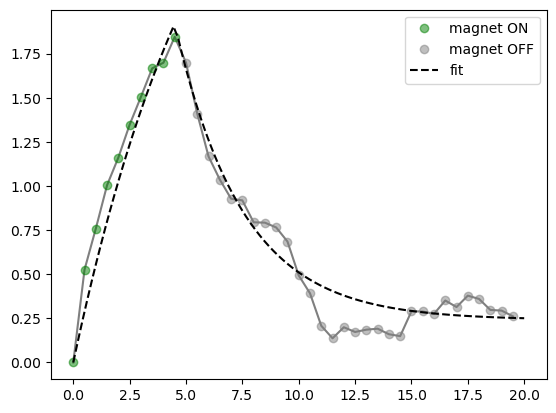

estimate of eta2:  106.71798778728484
k: 8.009871159213821 +/- 0.2825580080808233
eta_1: 31.054959919302004 +/- 0.9785698805044365
eta_2: 8.441928009367325 +/- 0.21191550912681797
8.009871159213821 31.054959919302004 8.441928009367325


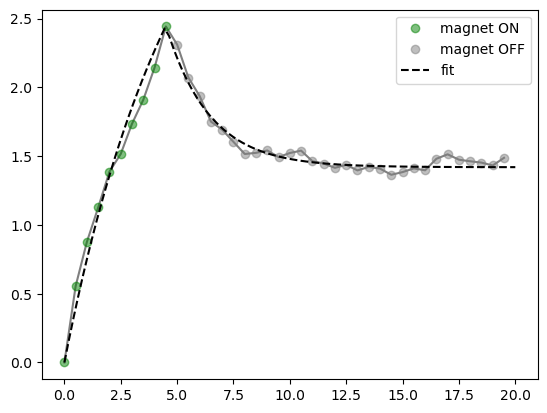

estimate of eta2:  111.2603177071994
k: 9.776660689119774 +/- 0.3933138667143788
eta_1: 17.715954239122254 +/- 1.33049503574009
eta_2: 9.00001860471351 +/- 0.3430258156084485
9.776660689119774 17.715954239122254 9.00001860471351
estimate of eta2:  124.2757645332427
k: 11.633531228177592 +/- 0.23020083724414184
eta_1: 27.33808234561445 +/- 0.7831719294825855
eta_2: 9.497385529173169 +/- 0.15129609529311455
11.633531228177592 27.33808234561445 9.497385529173169


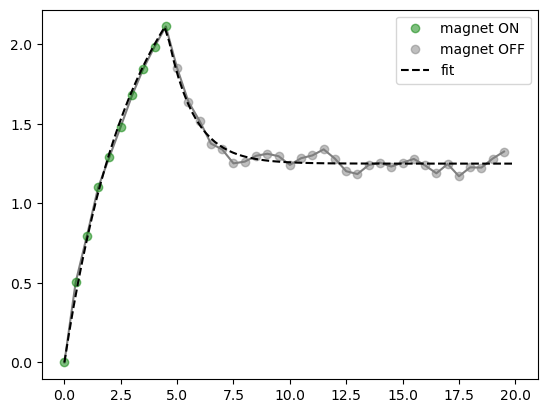

estimate of eta2:  126.85079552484757
k: 10.535661086627488 +/- 0.9711422442253687
eta_1: 28.65840445536307 +/- 2.407548876017346
eta_2: 2.3807225304577724 +/- 0.0831019312606417
10.535661086627488 28.65840445536307 2.3807225304577724


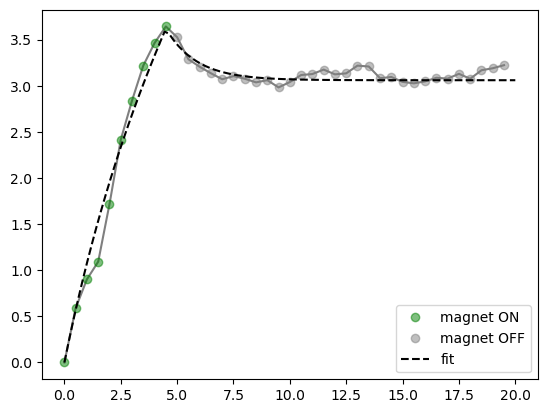

estimate of eta2:  143.81196713134852
k: 11.830881291913581 +/- 0.32310032402843514
eta_1: 19.433918266626538 +/- 0.8873271514415866
eta_2: 4.732444043903046 +/- 0.08991179486241971
11.830881291913581 19.433918266626538 4.732444043903046


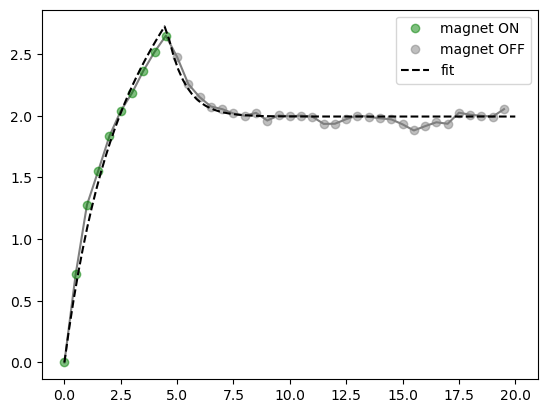

estimate of eta2:  124.43171686876724
k: 8.674079435983026 +/- 0.3882048569437463
eta_1: 27.864211401259222 +/- 1.3505759752605775
eta_2: 8.338991155280425 +/- 0.28030255228487777
8.674079435983026 27.864211401259222 8.338991155280425


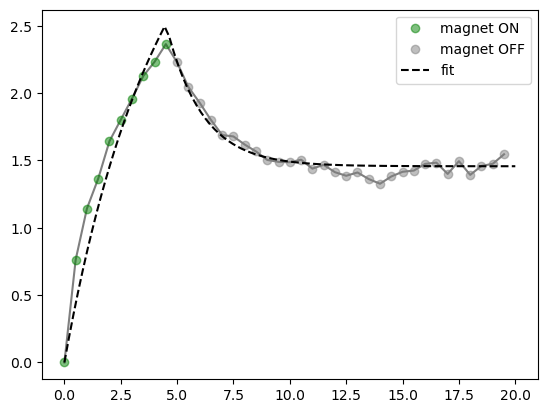

estimate of eta2:  141.2425768984662
k: 13.038155242362928 +/- 0.3289993557377113
eta_1: 27.01206561737071 +/- 1.1563664031103966
eta_2: 13.62528107621092 +/- 0.3295330313305056
13.038155242362928 27.01206561737071 13.62528107621092


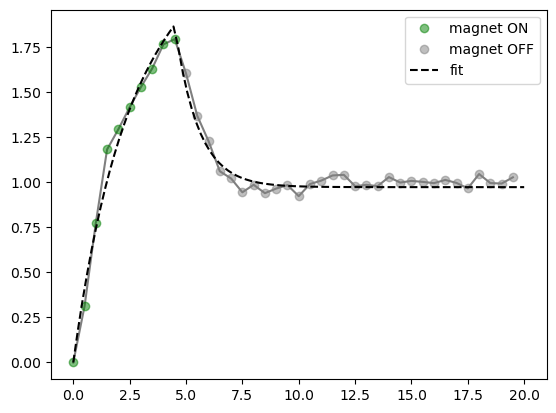

estimate of eta2:  80.53333319039139
k: 6.304048749509534 +/- 0.21120642943022958
eta_1: 20.194471890640227 +/- 0.7595742324371147
eta_2: 7.327290923593235 +/- 0.20483832590869447
6.304048749509534 20.194471890640227 7.327290923593235


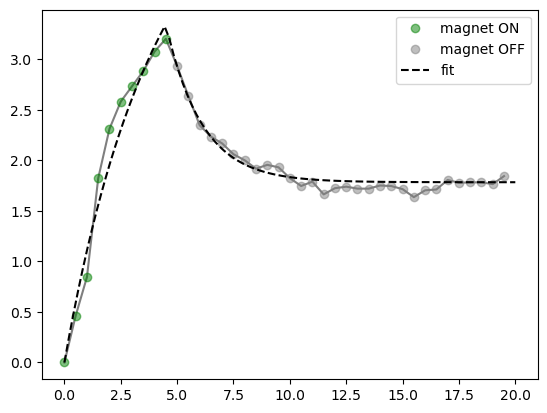

estimate of eta2:  76.09309416755774
k: 4.297228646257581 +/- 0.5296535494307306
eta_1: 23.89326406960308 +/- 1.5972707243999034
eta_2: 3.0144055047125735 +/- 0.17292620005398024
4.297228646257581 23.89326406960308 3.0144055047125735


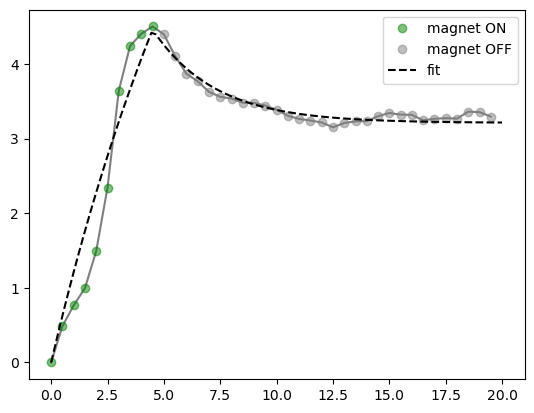

estimate of eta2:  79.66610139020864
k: 5.641087235583269 +/- 0.18527131318992168
eta_1: 25.59594125209577 +/- 0.6676419412377488
eta_2: 8.348992399945212 +/- 0.22309665032079054
5.641087235583269 25.59594125209577 8.348992399945212


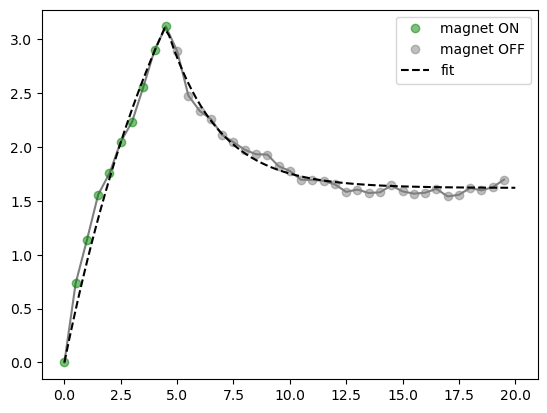

estimate of eta2:  73.78149198482404
k: 7.032979944944267 +/- 0.14152486333167652
eta_1: 7.54265827105173 +/- 0.3466036701147611
eta_2: 2.6157562273408725 +/- 0.042214147596916635
7.032979944944267 7.54265827105173 2.6157562273408725


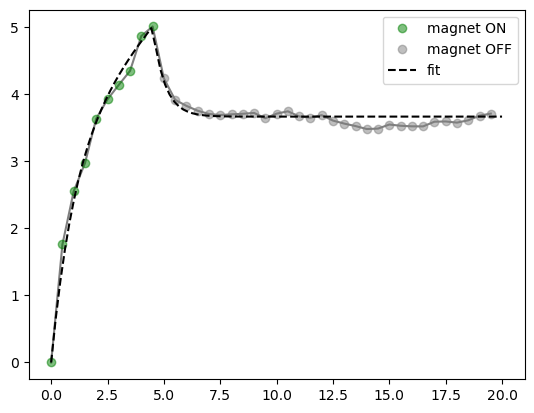

20240523_s02p01t02_1_5sON_15sOFF_spots
estimate of eta2:  70.84879972464744
k: 4.673471581253926 +/- 0.3330166295090755
eta_1: 7.0540611045017725 +/- 0.6068439952789798
eta_2: 0.6916066611301869 +/- 0.024648958547589604
4.673471581253926 7.0540611045017725 0.6916066611301869


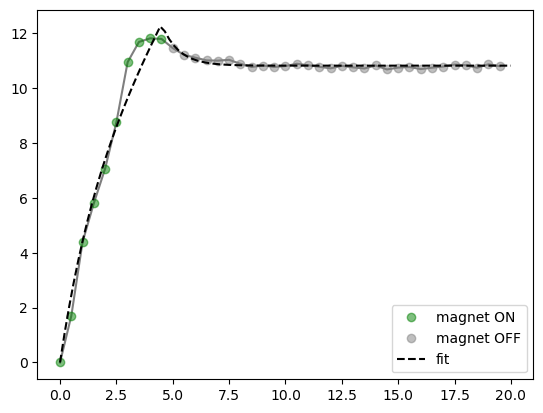

estimate of eta2:  77.06117466247996
k: 4.935550194231247 +/- 0.1750405767370546
eta_1: 2.2644567283706905 +/- 0.28539524958481216
eta_2: 0.4423912300917485 +/- 0.009647581078403638
4.935550194231247 2.2644567283706905 0.4423912300917485


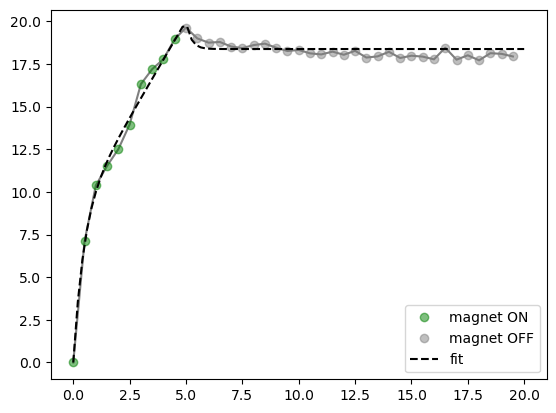

estimate of eta2:  392.8789663665804
k: 31.85085399435466 +/- 3.536631058950963
eta_1: 128.93207408970068 +/- 16.049263594600937
eta_2: 139.1093049816934 +/- 31.848774975249277
31.85085399435466 128.93207408970068 139.1093049816934
estimate of eta2:  458.9543512568304
k: 1009.8511643344212 +/- 3891.5784353666195
eta_1: 2.1415849488239718 +/- 0.0
eta_2: 5.841155315826318 +/- 1.4230738470969673
1009.8511643344212 2.1415849488239718 5.841155315826318
estimate of eta2:  89.79126214838807
k: 6.896073432906273 +/- 0.25288027789578743
eta_1: 17.075756454320764 +/- 0.8088616585165258
eta_2: 4.065071889827819 +/- 0.10397206117281647
6.896073432906273 17.075756454320764 4.065071889827819


/Users/ursic/PhD/Projects/1_DataAnalysis_zebrafish/beads_in_zebrafish/magnetic_tweezers_SD/utils.py:520: RuntimeWarning: overflow encountered in exp
  x_2 = (F_0 / k * (1 - np.exp(-k * t_1 / eta_1)) + t_1 / eta_2) * (a * np.exp(-(t-t_1) * 2 * k / eta_1) + (1-a))


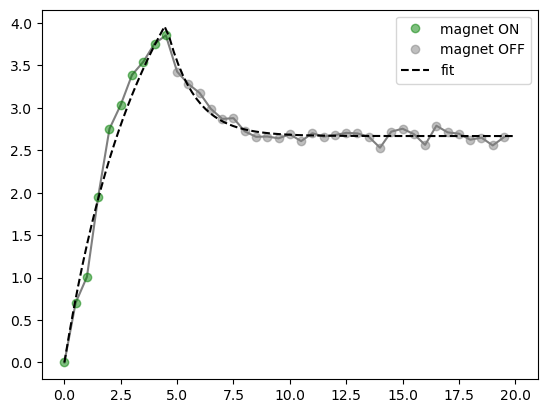

estimate of eta2:  86.20680248788062
k: 7.337226530894885 +/- 0.30319792369578524
eta_1: 12.948885951899179 +/- 0.9471750780487564
eta_2: 4.36848489643749 +/- 0.15019752588031865
7.337226530894885 12.948885951899179 4.36848489643749


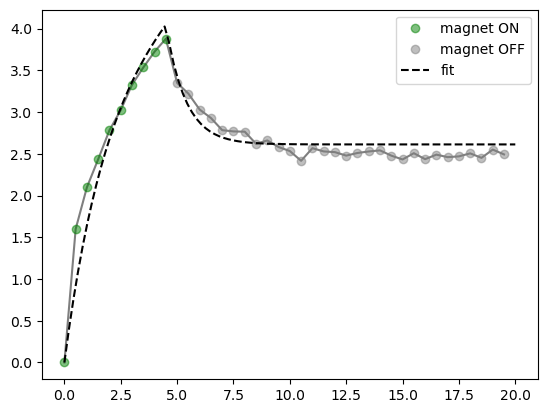

estimate of eta2:  104.07742087156727
k: 11.69321086409248 +/- 0.3058059512640221
eta_1: 20.935091226193965 +/- 1.0724951336551323
eta_2: 13.617395697311576 +/- 0.38695803173594706
11.69321086409248 20.935091226193965 13.617395697311576


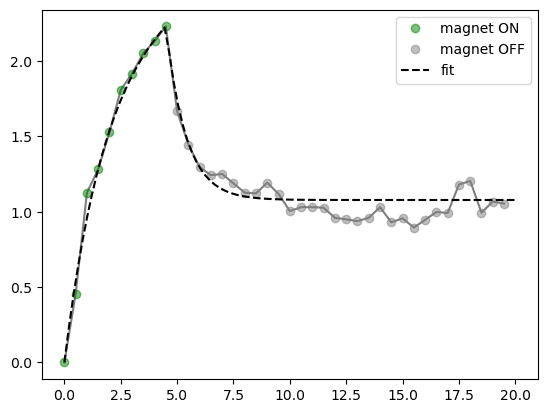

estimate of eta2:  39.073620576006945
k: 2.9537679913204107 +/- 0.11200447463609133
eta_1: 2.625356013124851 +/- 0.1845646743018065
eta_2: 0.40154416092948225 +/- 0.007643732690688818
2.9537679913204107 2.625356013124851 0.40154416092948225


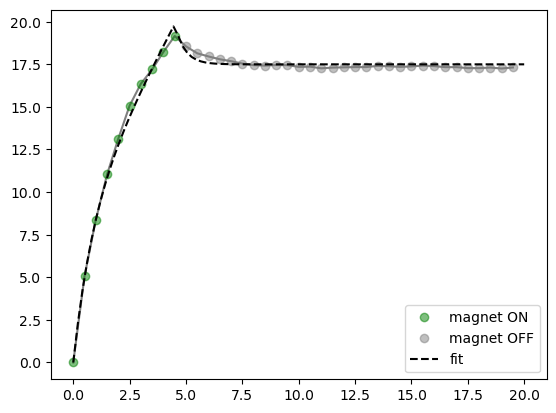

estimate of eta2:  65.08413235333744
k: 4.578407674371961 +/- 0.16596902871851885
eta_1: 3.653113509835934 +/- 0.2959586355503787
eta_2: 0.8005122891538766 +/- 0.01926897111645861
4.578407674371961 3.653113509835934 0.8005122891538766


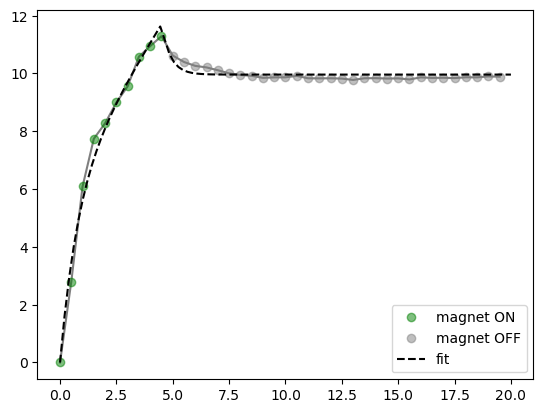

estimate of eta2:  75.35899477770418
k: 5.611367893973537 +/- 0.3091536055303711
eta_1: 14.395055856348106 +/- 1.005279237212095
eta_2: 3.279815494054477 +/- 0.13835896012803026
5.611367893973537 14.395055856348106 3.279815494054477


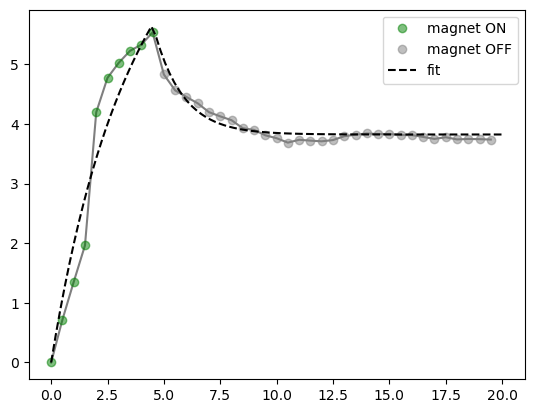

estimate of eta2:  51.79410001532484
k: 3.8096669899392657 +/- 0.14419037511654306
eta_1: 5.482251428496423 +/- 0.4045988788993049
eta_2: 1.5025397054732157 +/- 0.05714737738075476
3.8096669899392657 5.482251428496423 1.5025397054732157


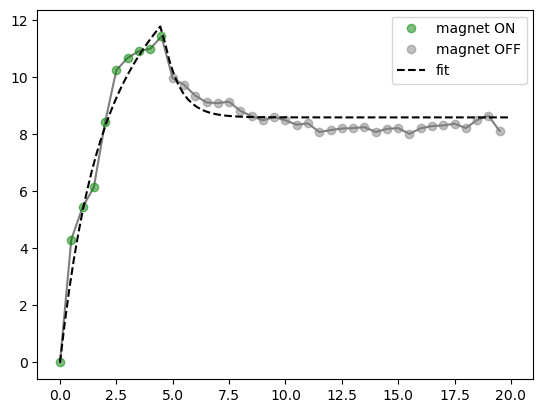

estimate of eta2:  61.963662738445095
k: 4.432018549406954 +/- 0.24962154429557926
eta_1: 13.923573474816878 +/- 0.9683902874008143
eta_2: 6.259154770494008 +/- 0.3805414520278153
4.432018549406954 13.923573474816878 6.259154770494008
estimate of eta2:  80.63239130776431
k: 5.700392121167223 +/- 0.15824082407170267
eta_1: 14.71483406819865 +/- 0.5625775921480785
eta_2: 4.321713964473482 +/- 0.11547117860854811
5.700392121167223 14.71483406819865 4.321713964473482


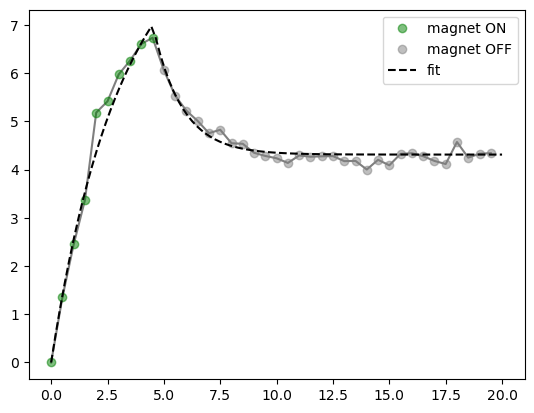

estimate of eta2:  79.96306017965922
k: 2.971578368824283 +/- 2.068558296843007
eta_1: 30.1165813252003 +/- 5.2052508333984
eta_2: 0.6486542397829199 +/- 0.10557010412130374
2.971578368824283 30.1165813252003 0.6486542397829199


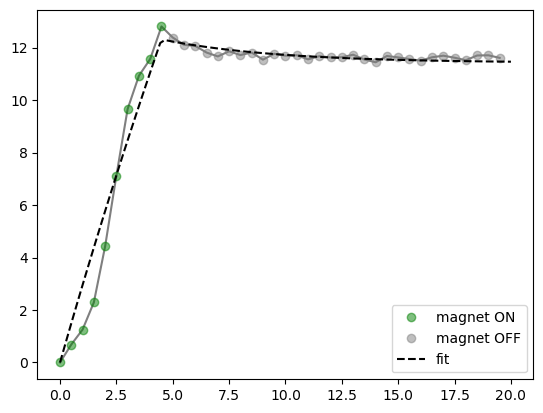

estimate of eta2:  161.13754670047942
k: 22.892874365796544 +/- 0.8527610739952843
eta_1: 69.41933201642597 +/- 3.804154810286054
eta_2: 145.3784140704866 +/- 16.502414541865697
22.892874365796544 69.41933201642597 145.3784140704866


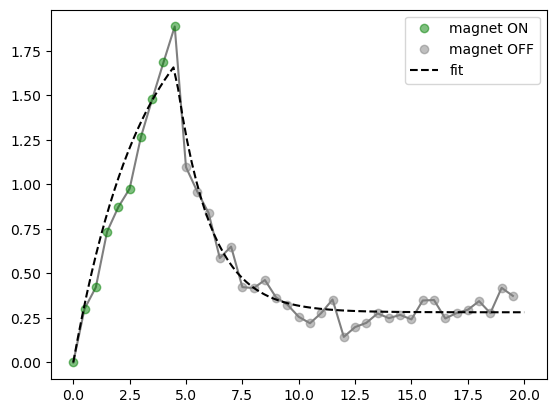

estimate of eta2:  120.47593663572627
k: 23.96122306009408 +/- 1.2445235858759798
eta_1: 46.82676121824514 +/- 4.811284677743738
eta_2: 1607609107.6034498 +/- 2.774557899103143e-14
23.96122306009408 46.82676121824514 1607609107.6034498
20240621_s02p02t01_2_5sON_15sOFF_spots
estimate of eta2:  77.07281318462297
k: 0.2201677588141357 +/- 0.08540268768326414
eta_1: 34.978927272163105 +/- 1.231162518199732
eta_2: 3709170.2144509545 +/- 3.1281506004651704e-12
0.2201677588141357 34.978927272163105 3709170.2144509545
estimate of eta2:  51.31107864844536
k: 90.2527193927427 +/- 1097.3479262504472
eta_1: 338.2177473048852 +/- 1761.8415928556585
eta_2: 0.3038513032957452 +/- 0.038470829939280894
90.2527193927427 338.2177473048852 0.3038513032957452


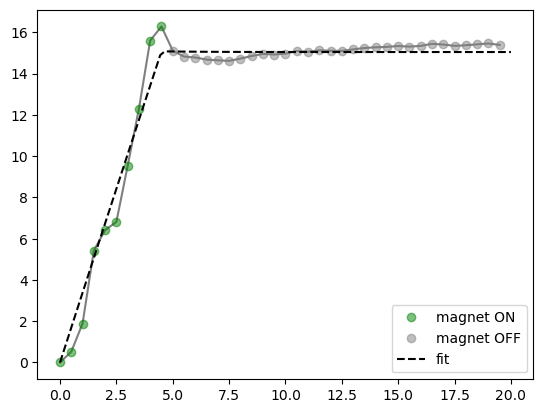

estimate of eta2:  99.36954048076416
k: 6.161913891270056 +/- 0.4624680292993474
eta_1: 12.817896364533352 +/- 0.8901058339315018
eta_2: 0.8614409101538737 +/- 0.06010169153933039
6.161913891270056 12.817896364533352 0.8614409101538737


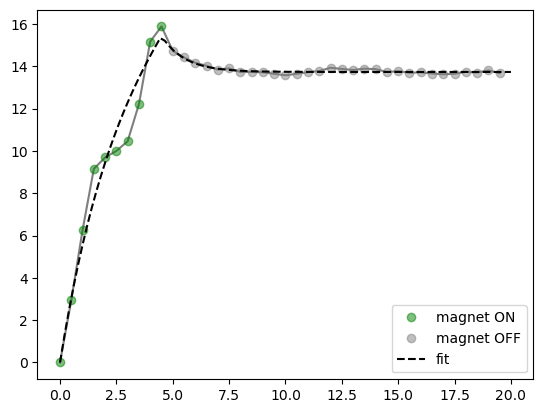

estimate of eta2:  131.0367432371469
k: 0.09418978162392673 +/- 3.290700184725103
eta_1: 52.096494348443876 +/- 85.26389001718186
eta_2: 1223098.8264012663 +/- 4209269695080.0586
0.09418978162392673 52.096494348443876 1223098.8264012663
estimate of eta2:  212.20686445930502
k: 19.09667079398613 +/- 0.8347425143361753
eta_1: 66.32609813526956 +/- 3.4278862735543894
eta_2: 29.34523600662162 +/- 1.5747853746308762
19.09667079398613 66.32609813526956 29.34523600662162


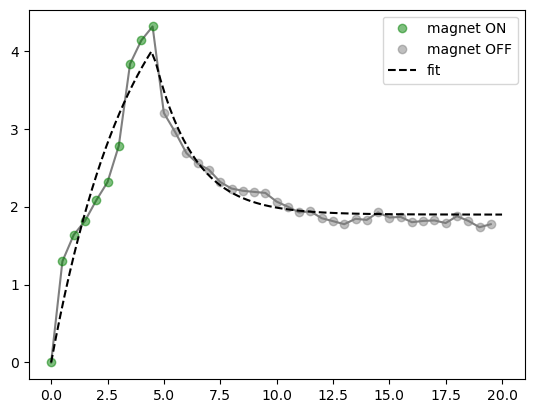

estimate of eta2:  375.2551926563822
k: 104.44877674926543 +/- 18.097298935207345
eta_1: 73.45905335098313 +/- 43.19382876051362
eta_2: 147565396.86926067 +/- 15538371415270.385
104.44877674926543 73.45905335098313 147565396.86926067
estimate of eta2:  86.02001802908902
k: 9.781935680474225 +/- 1.6338862233595077
eta_1: 46.24870059996693 +/- 5.71994625219095
eta_2: 11.571006813002962 +/- 1.4700800988422893
9.781935680474225 46.24870059996693 11.571006813002962
estimate of eta2:  95.77674338688112
k: 9.720861063863762 +/- 0.8725638149076912
eta_1: 17.728721410634254 +/- 2.1627924006269827
eta_2: 2.5820378698255793 +/- 0.17342246475054526
9.720861063863762 17.728721410634254 2.5820378698255793


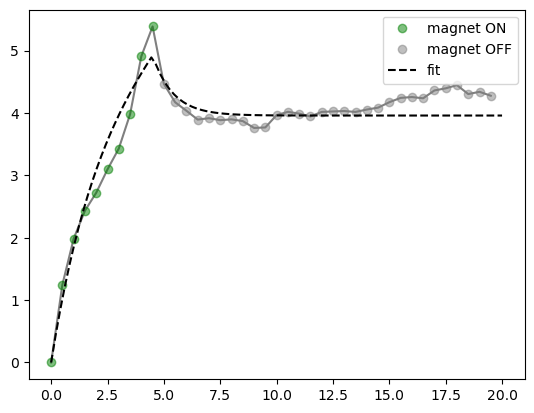

estimate of eta2:  112.80910038548765
k: 20.796692262610676 +/- 1.539488477914764
eta_1: 25.918017592550548 +/- 4.588454595360898
eta_2: 458658093.55647254 +/- 2.214528060181993e-14
20.796692262610676 25.918017592550548 458658093.55647254
estimate of eta2:  116.73079025278561
k: 5.675323763395481 +/- 0.7677469774371144
eta_1: 5.791427894616212 +/- 1.1009628797687518
eta_2: 0.5809095865480682 +/- 0.04719727042682273
5.675323763395481 5.791427894616212 0.5809095865480682


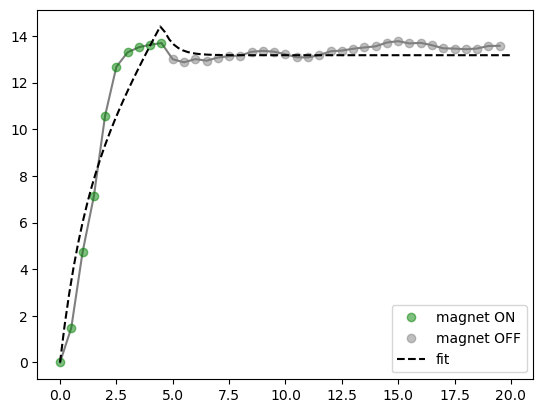

estimate of eta2:  112.70000331363966
k: 8.325337398863766 +/- 2.5483444048190202
eta_1: 63.43257534873123 +/- 7.635315843840945
eta_2: 9.516989142080135 +/- 1.8461803461034652
8.325337398863766 63.43257534873123 9.516989142080135
estimate of eta2:  98.20306694160101
k: 5.368659852781461 +/- 0.3439765892647583
eta_1: 10.458932735949585 +/- 1.0168666674732751
eta_2: 1.9603194926135958 +/- 0.12667776871270617
5.368659852781461 10.458932735949585 1.9603194926135958


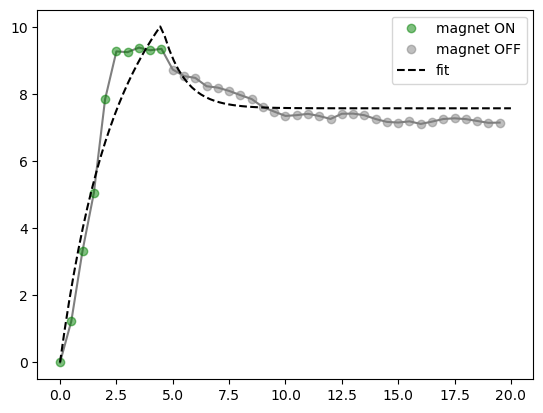

estimate of eta2:  122.80774568834308
k: 22.48945633267615 +/- 0.964401429837105
eta_1: 31.855275025849906 +/- 3.3649922944518154
eta_2: 71.3805707220632 +/- 6.571765302313607
22.48945633267615 31.855275025849906 71.3805707220632
estimate of eta2:  144.37008151351947
k: 12.638948882574292 +/- 0.8617828222466326
eta_1: 28.014526502268325 +/- 2.385303865320688
eta_2: 3.73178994745086 +/- 0.23594708021439637
12.638948882574292 28.014526502268325 3.73178994745086


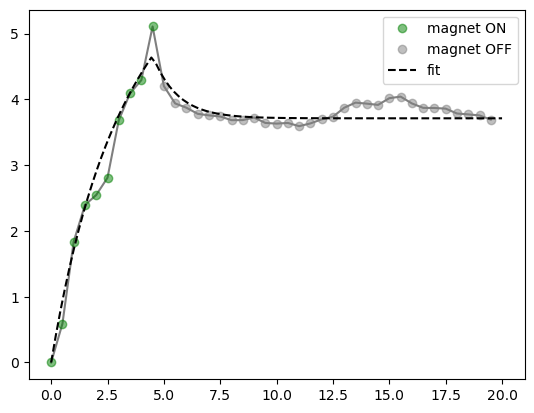

estimate of eta2:  215.71747209048957
k: 15.241193670109567 +/- 0.6403692874972192
eta_1: 11.925319833869352 +/- 1.6953208428044066
eta_2: 6.118399819832671 +/- 0.4019614393050387
15.241193670109567 11.925319833869352 6.118399819832671
estimate of eta2:  165.84510922499874
k: 13.489523355501557 +/- 0.3224153148704535
eta_1: 18.67303322671484 +/- 1.060770323274463
eta_2: 7.209095064234831 +/- 0.2433781160926394
13.489523355501557 18.67303322671484 7.209095064234831


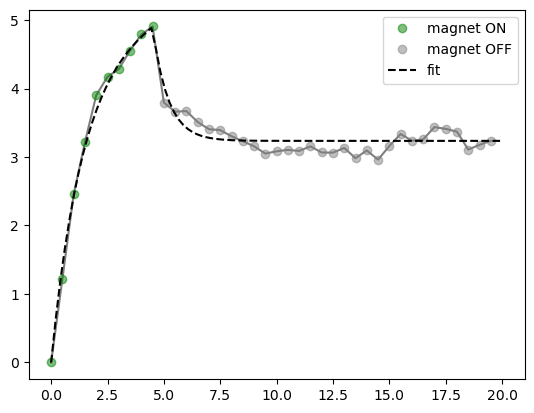

estimate of eta2:  87.45291624638423
k: 2.7922821545867995 +/- 1.1356080570663925
eta_1: 25.308024970631614 +/- 2.5995484647546916
eta_2: 1.1380918421261432 +/- 0.213303262083908
2.7922821545867995 25.308024970631614 1.1380918421261432


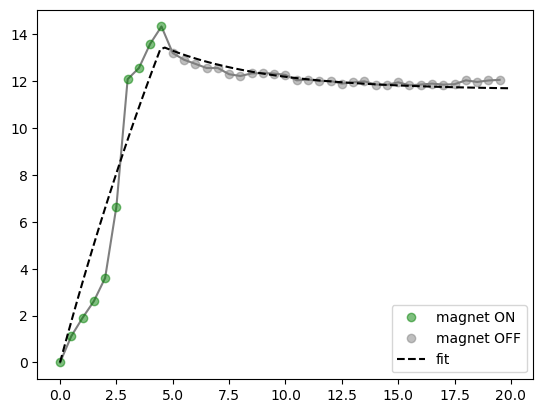

estimate of eta2:  78.6752027930075
k: 6.56404104041216 +/- 0.3223379396589118
eta_1: 11.933015246956504 +/- 1.1276743105127576
eta_2: 5.21525510888281 +/- 0.2833857608778452
6.56404104041216 11.933015246956504 5.21525510888281
estimate of eta2:  118.13512002512556
k: 27.510270876963826 +/- 2.281407676434982
eta_1: 25.88525422859727 +/- 5.918033036127167
eta_2: 2842616258.9001074 +/- 1.651657207935542e-14
27.510270876963826 25.88525422859727 2842616258.9001074
estimate of eta2:  48.77531366280163
k: 2.6273615186483554 +/- 0.3764427011351544
eta_1: 14.207728893406756 +/- 1.0295233295806763
eta_2: 0.9791932016905565 +/- 0.06824764501314502
2.6273615186483554 14.207728893406756 0.9791932016905565


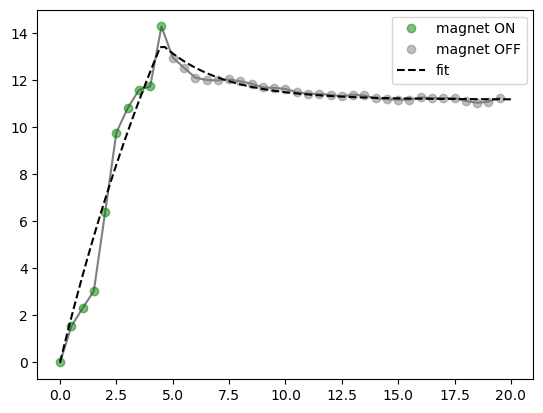

estimate of eta2:  55.90514400931227
k: 19.465471263956502 +/- 28.939363913280115
eta_1: 65.46660716747255 +/- 35.5293102734696
eta_2: 0.1806518882189867 +/- 0.012959052179953764
19.465471263956502 65.46660716747255 0.1806518882189867


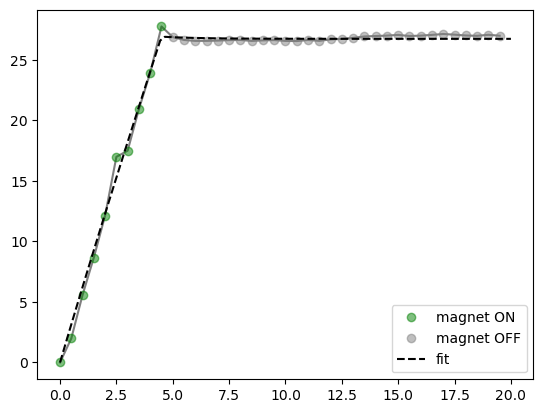

estimate of eta2:  140.95982769665122
k: 17.832341931425372 +/- 0.30249772589751345
eta_1: 31.447813306555005 +/- 1.1676282597667305
eta_2: 40.46811892606577 +/- 1.219169459582279
17.832341931425372 31.447813306555005 40.46811892606577


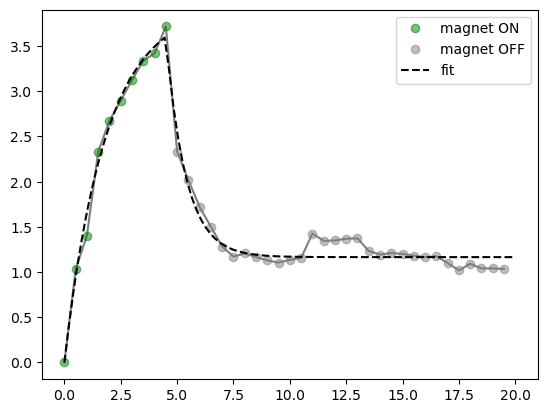

estimate of eta2:  87.17311530095947
k: 24.75534182929391 +/- 7.41220511759661
eta_1: 5.0279203937483405 +/- 10.445142269377046
eta_2: 0.2151011005185708 +/- 0.01045452234284034
24.75534182929391 5.0279203937483405 0.2151011005185708


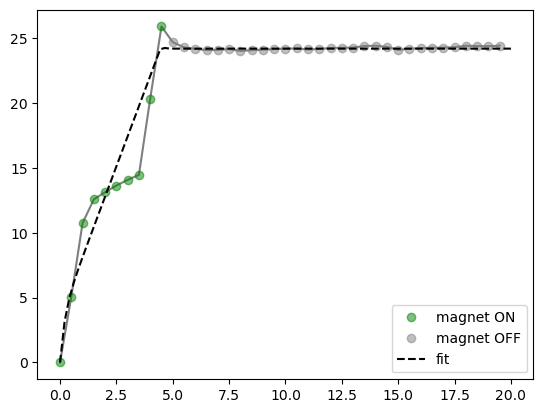

estimate of eta2:  283.30413781024504
k: 11.928085644214528 +/- 0.5610541045087021
eta_1: 17.66039216588913 +/- 1.2681349521000609
eta_2: 1.87647970138403 +/- 0.16525342012280353
11.928085644214528 17.66039216588913 1.87647970138403


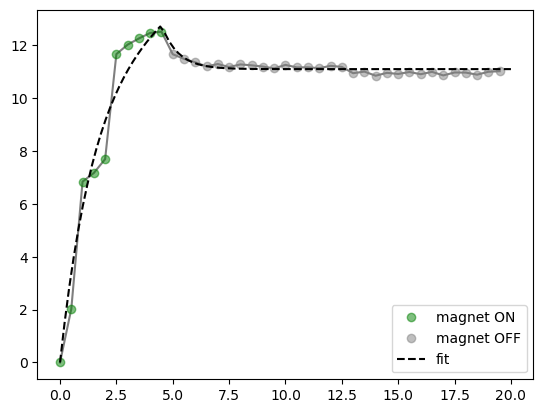

estimate of eta2:  73.84297069031896
k: 6.450178686791821 +/- 1.0557601671314032
eta_1: 24.622808674985393 +/- 2.6401324610853285
eta_2: 1.4300373881787611 +/- 0.09979328840467261
6.450178686791821 24.622808674985393 1.4300373881787611


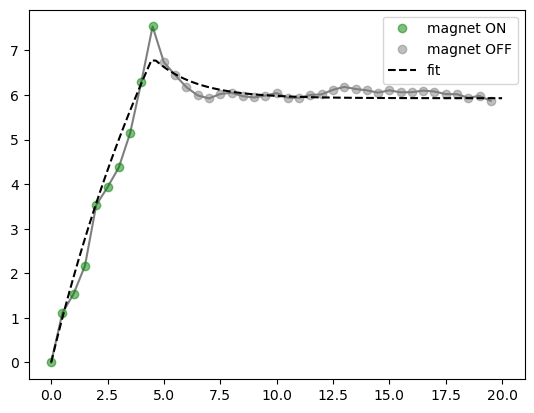

estimate of eta2:  124.31604285913318
k: 23.860348129729445 +/- 2.341769261102782
eta_1: 48.058978572714885 +/- 9.222561114176912
eta_2: 2988761957.401588 +/- 2.5829582004420235e-14
23.860348129729445 48.058978572714885 2988761957.401588
estimate of eta2:  123.50101315994648
k: 9.287042738649687 +/- 0.24534727970979217
eta_1: 4.508411614458501 +/- 0.4045225011937091
eta_2: 1.3979357306387026 +/- 0.031197430993325836
9.287042738649687 4.508411614458501 1.3979357306387026


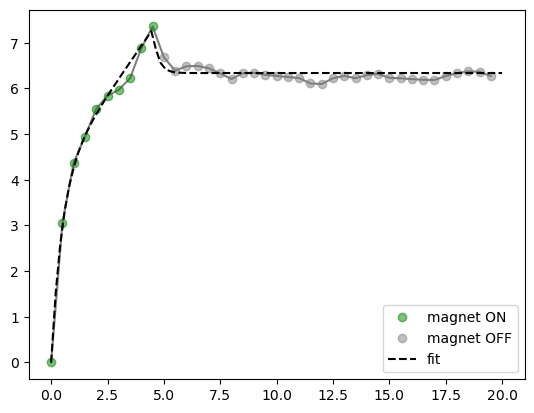

estimate of eta2:  82.2017232786201
k: 6.209911493895553 +/- 0.9975238492103092
eta_1: 18.54997140181679 +/- 2.091985303628772
eta_2: 0.9238191791513619 +/- 0.0695613562757774
6.209911493895553 18.54997140181679 0.9238191791513619


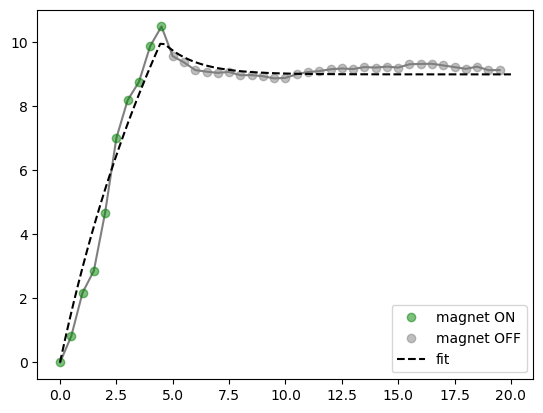

estimate of eta2:  127.59996685355955
k: 1.1205184395944022e-08 +/- 0.02330742401644858
eta_1: 30.374732795031044 +/- 0.7808497121148487
eta_2: 1.4638326296287483 +/- 0.10151502905118558
1.1205184395944022e-08 30.374732795031044 1.4638326296287483


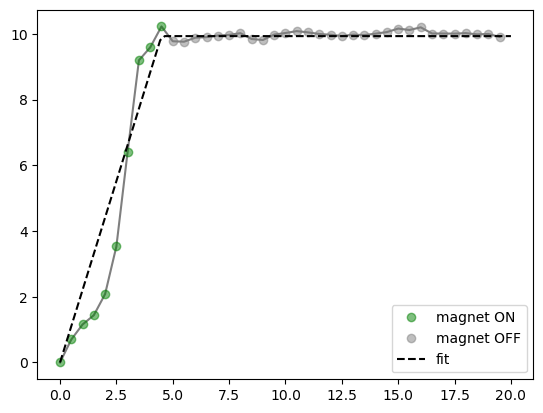

estimate of eta2:  190.66149111503879
k: 80.43994864850312 +/- 36.782189096437186
eta_1: 31.45589996119419 +/- 82.55165020495541
eta_2: 36248.429232071285 +/- 3223079.83135806
80.43994864850312 31.45589996119419 36248.429232071285
estimate of eta2:  122.65494772238199
k: 9.172862933811272 +/- 0.38669627232733694
eta_1: 5.344879454459721 +/- 0.9545361590365455
eta_2: 3.603832176803263 +/- 0.24439656652569328
9.172862933811272 5.344879454459721 3.603832176803263
estimate of eta2:  102.37216162909587
k: 2.2874957405603677e-06 +/- 1.8850728326564232
eta_1: 61.815679504420835 +/- 231.54593808867247
eta_2: 0.41442494714760697 +/- 0.6394523319559523
2.2874957405603677e-06 61.815679504420835 0.41442494714760697


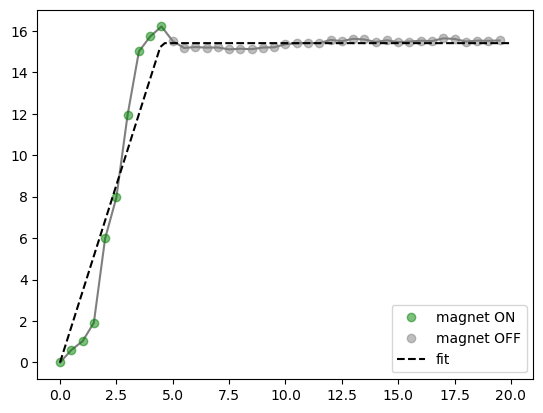

estimate of eta2:  293.66148413165945
k: 16.857582163893046 +/- 0.6535606192726301
eta_1: 11.837909740868378 +/- 1.2096360774171924
eta_2: 2.703218852010796 +/- 0.16309777184013036
16.857582163893046 11.837909740868378 2.703218852010796


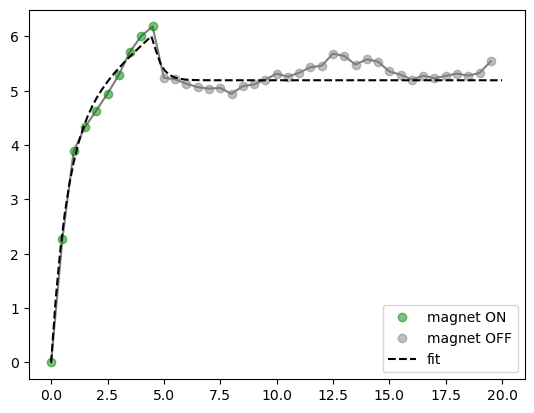

estimate of eta2:  241.05613337983402
k: 10.442293847668884 +/- 0.1871854722146828
eta_1: 5.224146974156446 +/- 0.3453006246623616
eta_2: 1.6488883728329558 +/- 0.05596404896065094
10.442293847668884 5.224146974156446 1.6488883728329558


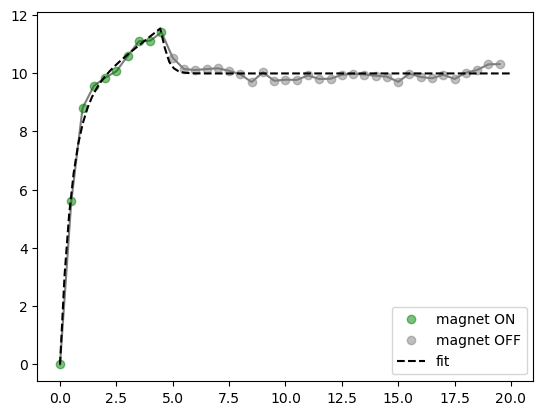

estimate of eta2:  492.47632074866095
k: 33.69957008943442 +/- 0.9607978962473591
eta_1: 49.667847128093854 +/- 3.4721077089536947
eta_2: 17.972000490071796 +/- 0.885147821880091
33.69957008943442 49.667847128093854 17.972000490071796


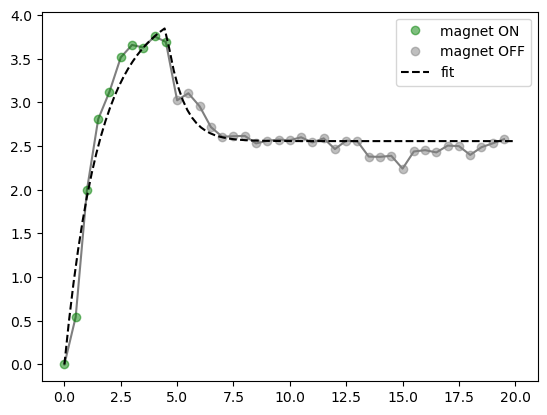

estimate of eta2:  70.26443568218374
k: 3.8797563938103274 +/- 0.14088481361766425
eta_1: 2.6918339868920893 +/- 0.29485946034387317
eta_2: 1.0379370454329813 +/- 0.03936368234162395
3.8797563938103274 2.6918339868920893 1.0379370454329813


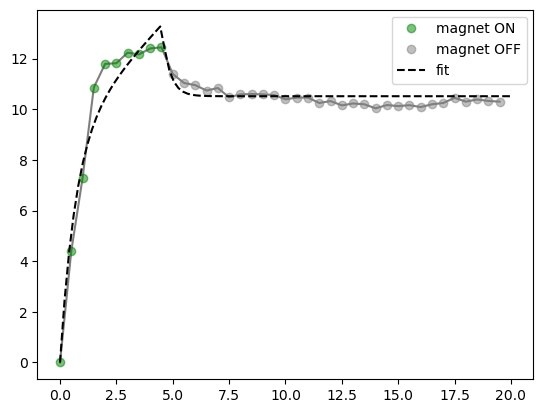

estimate of eta2:  133.04229657372065
k: 22.554077658239024 +/- 1.1709170057467333
eta_1: 63.07866538207467 +/- 5.681555977237467
eta_2: 763082209.3616933 +/- 3.1623674250998245e-14
22.554077658239024 63.07866538207467 763082209.3616933


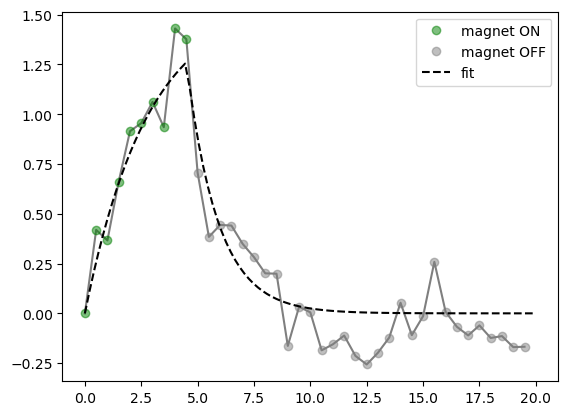

estimate of eta2:  115.06873180675782
k: 13.267618385127355 +/- 0.4056797407906485
eta_1: 38.238674017738965 +/- 1.707085575901944
eta_2: 43.706518985631334 +/- 2.449211081037597
13.267618385127355 38.238674017738965 43.706518985631334


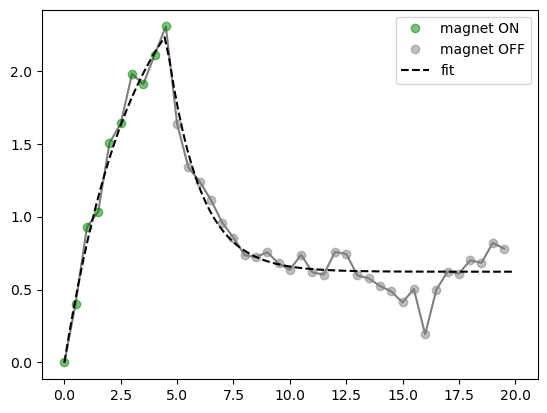

estimate of eta2:  90.1075117694197
k: 6.1232751995708155 +/- 2.0211823917162133
eta_1: 28.758819055784937 +/- 4.7167576764703005
eta_2: 0.883537011154175 +/- 0.0877048518563999
6.1232751995708155 28.758819055784937 0.883537011154175


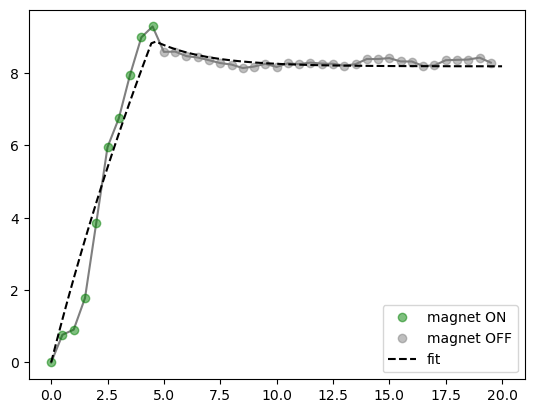

estimate of eta2:  209.65990179270037
k: 14.371259854296616 +/- 1.1174961764853995
eta_1: 22.10393549256112 +/- 3.0292606758192933
eta_2: 4.756045699458975 +/- 0.3775457345240912
14.371259854296616 22.10393549256112 4.756045699458975
estimate of eta2:  157.6388024787134
k: 15.158559249953582 +/- 0.41260101235132784
eta_1: 21.27781764002424 +/- 1.4394532005222722
eta_2: 17.22000623550718 +/- 0.6404697633023506
15.158559249953582 21.27781764002424 17.22000623550718


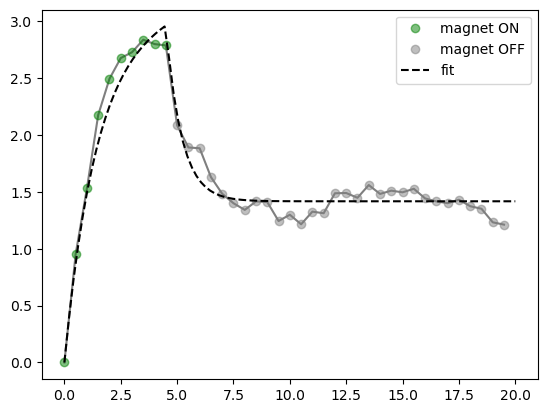

estimate of eta2:  123.43754583665361
k: 0.11346509626438624 +/- 4.15574794620639
eta_1: 48.40745267213137 +/- 152.14496189023546
eta_2: 998407.9611772334 +/- 2991975332652.9873
0.11346509626438624 48.40745267213137 998407.9611772334
estimate of eta2:  97.30347848029382
k: 10.923498531405052 +/- 0.9782405207532344
eta_1: 26.530065773816162 +/- 3.4977342696008513
eta_2: 7.746491306544693 +/- 0.7214773118588421
10.923498531405052 26.530065773816162 7.746491306544693
estimate of eta2:  70.77707249267648
k: 6.430465181663751e-07 +/- 0.30844402358474926
eta_1: 24.975135294715336 +/- 34.4488580470036
eta_2: 0.6014616275567786 +/- 1.149349240227727
6.430465181663751e-07 24.975135294715336 0.6014616275567786


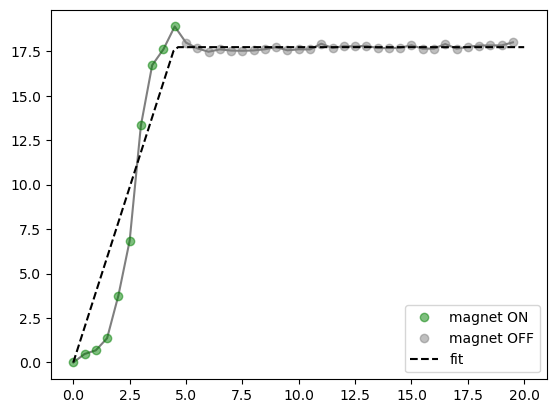

estimate of eta2:  71.25263670324507
k: 0.004662703271971238 +/- 0.08172553808755526
eta_1: 13.144058987132878 +/- 11.6296599158128
eta_2: 224715.23669218004 +/- 286974709439.4433
0.004662703271971238 13.144058987132878 224715.23669218004


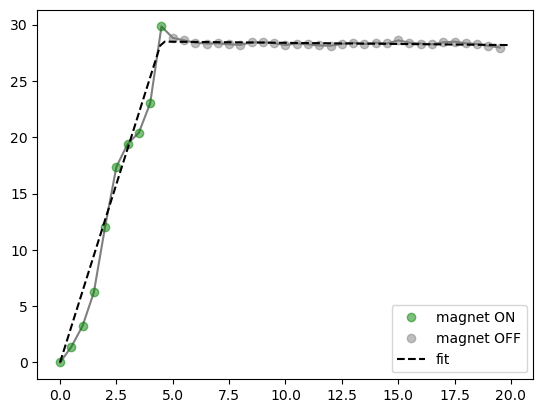

estimate of eta2:  287.2943191389894
k: 36.78911682199828 +/- 1.841290407081692
eta_1: 143.5339318176695 +/- 9.295045724484197
eta_2: 1002.958699855587 +/- 527.1105680617873
36.78911682199828 143.5339318176695 1002.958699855587


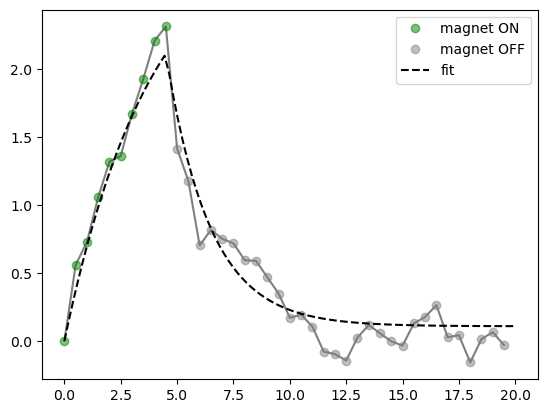

estimate of eta2:  307.8659666818941
k: 9.640335829046188 +/- 0.20322785341049715
eta_1: 5.92875542067657 +/- 0.43014766912627866
eta_2: 1.5703444001418276 +/- 0.08834130629387661
9.640335829046188 5.92875542067657 1.5703444001418276


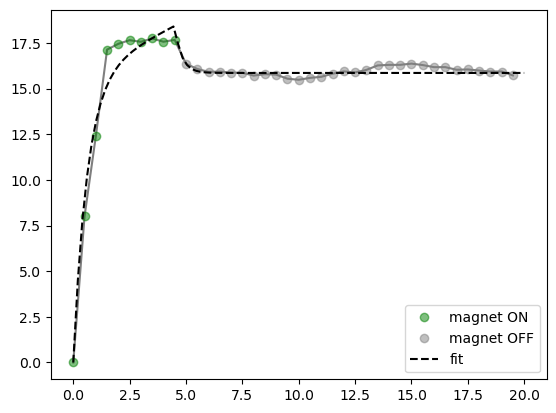

estimate of eta2:  206.7986216524897
k: 6.625155515797425 +/- 0.6556043425890727
eta_1: 21.93696018048403 +/- 1.7532294857173893
eta_2: 1.1258294032087546 +/- 0.1653974241509531
6.625155515797425 21.93696018048403 1.1258294032087546


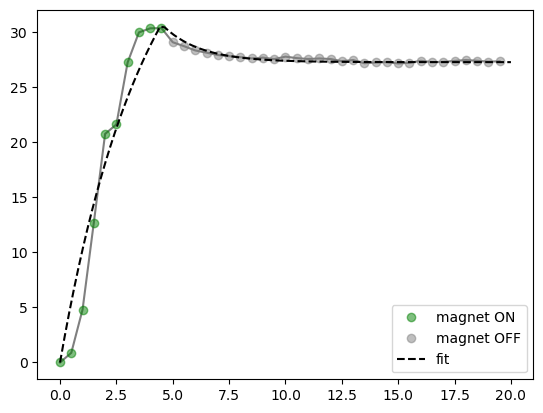

estimate of eta2:  42.65909140027541
k: 1.9761377130798565 +/- 2.2180697674641485
eta_1: 28.86426484264558 +/- 4.984198260830026
eta_2: 1.7834833715748295 +/- 0.6613138412070753
1.9761377130798565 28.86426484264558 1.7834833715748295
estimate of eta2:  72.29127314751118
k: 14.335830286902373 +/- 16.972815457135653
eta_1: 74.97613912426449 +/- 42.74672778604005
eta_2: 2.057682238181109 +/- 0.4852219169738122
14.335830286902373 74.97613912426449 2.057682238181109
estimate of eta2:  115.8942406517333
k: 21.24128527838981 +/- 1.052226897182214
eta_1: 26.43001958727133 +/- 3.2409150730385816
eta_2: 386.94493624474853 +/- 163.1236157303546
21.24128527838981 26.43001958727133 386.94493624474853


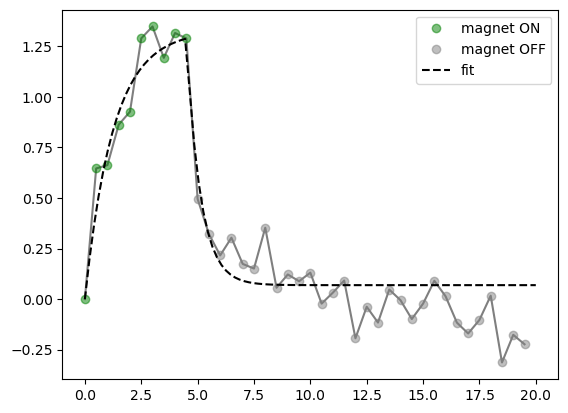

estimate of eta2:  126.86853241512321
k: 9.991495532047002 +/- 0.45422281477349996
eta_1: 5.277517989830847 +/- 0.973885131355292
eta_2: 3.503587386631394 +/- 0.1602054146965339
9.991495532047002 5.277517989830847 3.503587386631394
estimate of eta2:  94.22855830528754
k: 5.8555453645346 +/- 0.16487512011398073
eta_1: 1.2669535240459362 +/- 0.38353144001907913
eta_2: 2.049851686361142 +/- 0.061435946632557935
5.8555453645346 1.2669535240459362 2.049851686361142


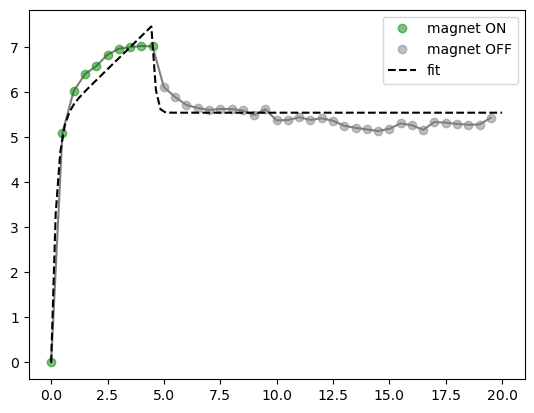

estimate of eta2:  168.2472916811493
k: 18.015478914226104 +/- 0.6196896880050854
eta_1: 11.039743687976234 +/- 1.5502413889307136
eta_2: 10.407534783466636 +/- 0.4332706738859928
18.015478914226104 11.039743687976234 10.407534783466636
estimate of eta2:  44.219926405051005
k: 3.1114308693107056 +/- 0.324319173778447
eta_1: 9.383735916365104 +/- 0.7716944410173371
eta_2: 0.6335142517180968 +/- 0.0320618644080542
3.1114308693107056 9.383735916365104 0.6335142517180968


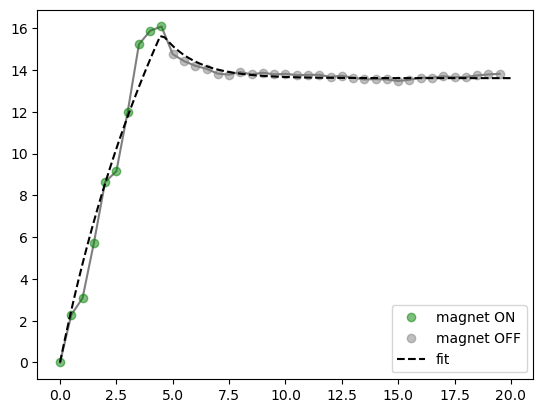

estimate of eta2:  83.4007447452729
k: 14.022518766616148 +/- 0.4791858440345671
eta_1: 29.825108299168765 +/- 1.951895647370501
eta_2: 1725412988.7714415 +/- 6.838055089139573e-15
14.022518766616148 29.825108299168765 1725412988.7714415


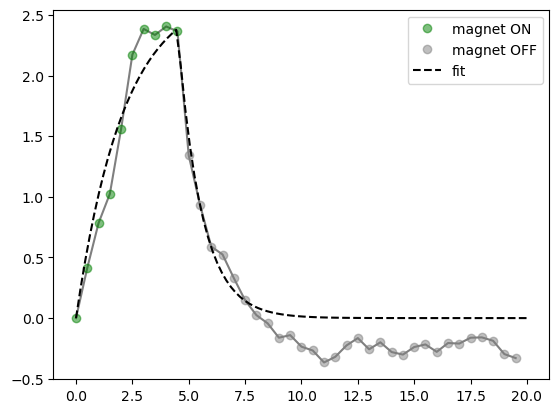

estimate of eta2:  99.04304145407819
k: 57.884722393791904 +/- 42.133016358232375
eta_1: 20.045034250325003 +/- 97.19008708173195
eta_2: 11476.011450009857 +/- 715594.7542733932
57.884722393791904 20.045034250325003 11476.011450009857
estimate of eta2:  203.31036280372
k: 29.950556300277825 +/- 3.8795574687993186
eta_1: 99.36895437826773 +/- 15.964329830726049
eta_2: 66.5460783681491 +/- 11.66969950107681
29.950556300277825 99.36895437826773 66.5460783681491
estimate of eta2:  136.45410449075558
k: 38.441471751078126 +/- 3.5998475248216257
eta_1: 46.51130068113093 +/- 10.829696233656945
eta_2: 36465590.01302851 +/- 1411067696916.0479
38.441471751078126 46.51130068113093 36465590.01302851
estimate of eta2:  78.83426271208045
k: 4.453665161513811 +/- 0.19650861652657095
eta_1: 4.577649274505744 +/- 0.4520239692395702
eta_2: 1.1782181024732523 +/- 0.06057138426683305
4.453665161513811 4.577649274505744 1.1782181024732523


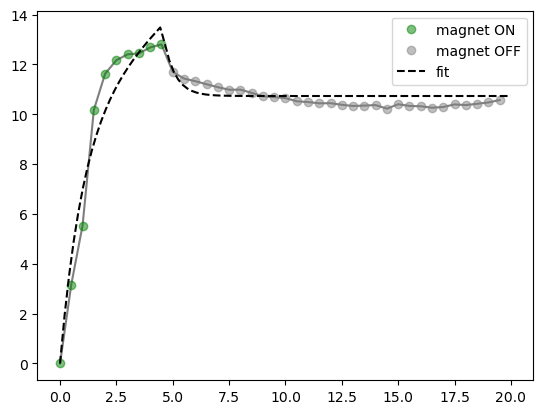

estimate of eta2:  169.78125939940605
k: 83.15287835270695 +/- 49.07392658733894
eta_1: 19.93085524142574 +/- 133.65820287908628
eta_2: 18819.80977636541 +/- 1077409.939818279
83.15287835270695 19.93085524142574 18819.80977636541
estimate of eta2:  117.51735524602347
k: 15.664297006814408 +/- 2.675472588685915
eta_1: 23.225346668756472 +/- 5.140552093822104
eta_2: 2.650963976943024 +/- 0.28739870428314285
15.664297006814408 23.225346668756472 2.650963976943024


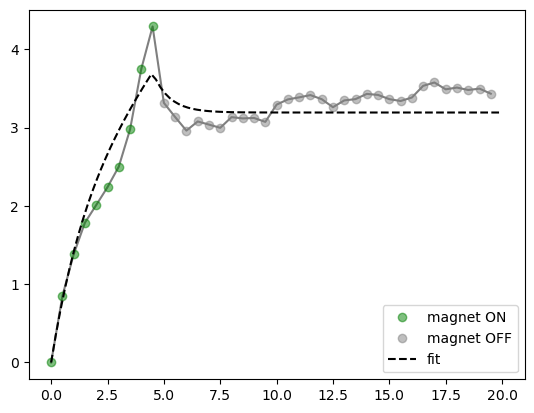

estimate of eta2:  55.597786428861596
k: 2.988065544474141 +/- 0.5967034454856703
eta_1: 19.58224647350166 +/- 1.7287254234950724
eta_2: 2.152400222457927 +/- 0.22485377014721492
2.988065544474141 19.58224647350166 2.152400222457927


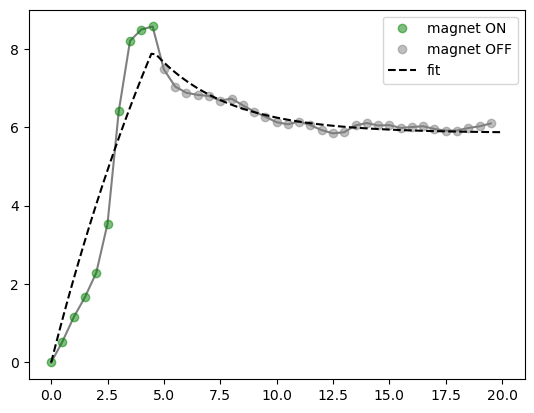

estimate of eta2:  97.96626562605381
k: 7.607385374948327 +/- 0.20496026585002253
eta_1: 6.350050198217024 +/- 0.5399568917339691
eta_2: 3.514175044182166 +/- 0.12029074939464418
7.607385374948327 6.350050198217024 3.514175044182166


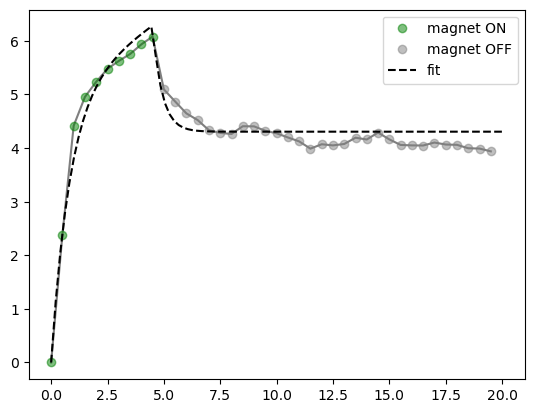

estimate of eta2:  74.4551554578927
k: 6.360249978368818 +/- 1.2005508154710922
eta_1: 18.24465295155691 +/- 2.389599923634333
eta_2: 0.8493563348733955 +/- 0.07125949878317941
6.360249978368818 18.24465295155691 0.8493563348733955


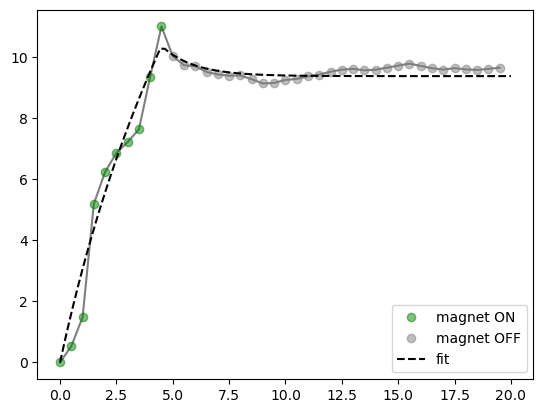

estimate of eta2:  49.338131613767764
k: 4.426179125716636 +/- 0.6976108261459123
eta_1: 9.471545270643896 +/- 0.8440017747403943
eta_2: 0.27520069305357564 +/- 0.016701042238030817
4.426179125716636 9.471545270643896 0.27520069305357564


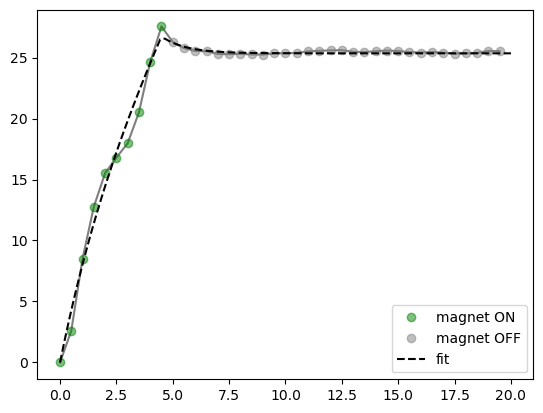

estimate of eta2:  101.60729384544528
k: 4.290894420916608 +/- 1.9390180533966193
eta_1: 31.614509523464758 +/- 4.613306101139807
eta_2: 0.6485276224840165 +/- 0.10905577888101088
4.290894420916608 31.614509523464758 0.6485276224840165


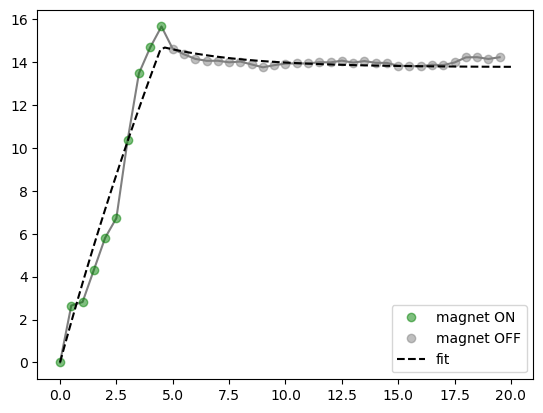

estimate of eta2:  135.4588740825908
k: 5.859616596194082 +/- 0.298567615507431
eta_1: 10.679320842375345 +/- 0.8127272807888716
eta_2: 1.2520094949406284 +/- 0.10555452450025522
5.859616596194082 10.679320842375345 1.2520094949406284


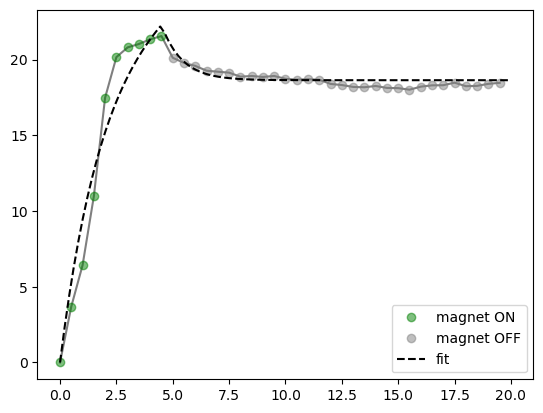

estimate of eta2:  42.677475499626865
k: 0.012574816186101692 +/- 0.18489706380562404
eta_1: 10.615258223237088 +/- 15.79289247599512
eta_2: 235210.33368221202 +/- 309125124655.5163
0.012574816186101692 10.615258223237088 235210.33368221202


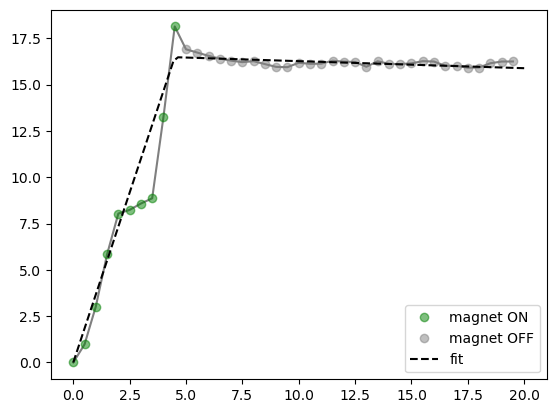

estimate of eta2:  92.28719454590613
k: 5.450560802064192 +/- 0.15818840400220713
eta_1: 8.468364486497254 +/- 0.34741893507177046
eta_2: 1.1122302926599885 +/- 0.03092393204150115
5.450560802064192 8.468364486497254 1.1122302926599885


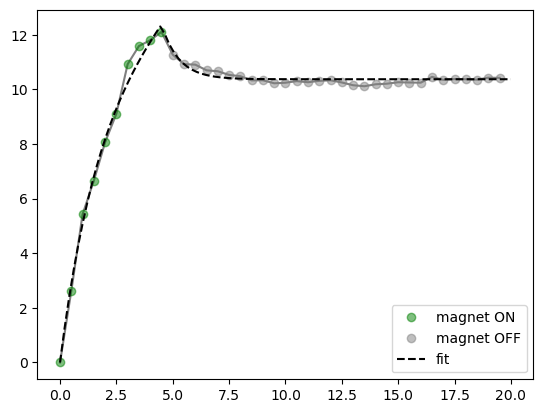

estimate of eta2:  225.55843653649123
k: 28.781166460753866 +/- 0.8423058389797686
eta_1: 27.301587158209404 +/- 2.627276106983893
eta_2: 31.585670860028536 +/- 1.3955581453046113
28.781166460753866 27.301587158209404 31.585670860028536


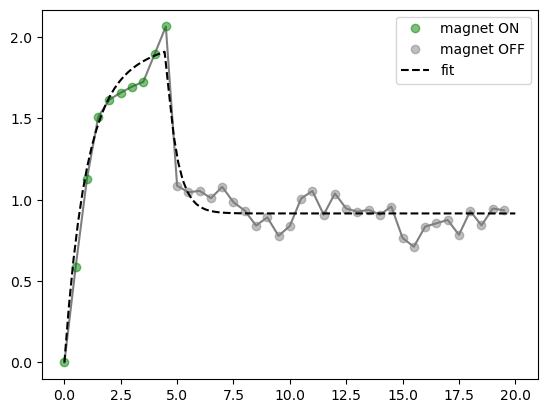

estimate of eta2:  98.52963057031825
k: 5.180253405030635 +/- 0.4068573997244185
eta_1: 11.790600407606501 +/- 0.8449356970873159
eta_2: 0.8231570106628294 +/- 0.05324060213017762
5.180253405030635 11.790600407606501 0.8231570106628294


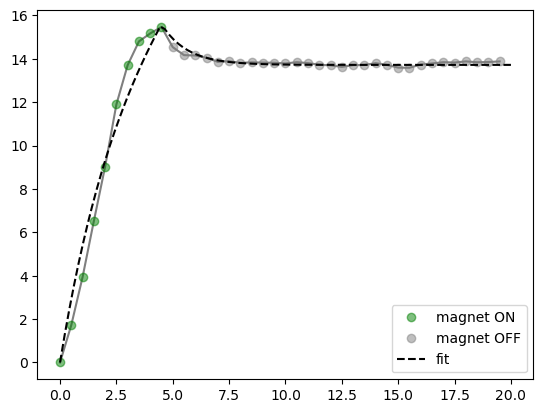

estimate of eta2:  911.3332951958979
k: 133.30303228624138 +/- 21.65436748895788
eta_1: 85.87279005585734 +/- 60.48774314308627
eta_2: 168.66210224336385 +/- 44.791295267955256
133.30303228624138 85.87279005585734 168.66210224336385
estimate of eta2:  240.3163681784867
k: 30.85527686023549 +/- 2.2404296858774924
eta_1: 74.6329304238936 +/- 9.035135822722868
eta_2: 45.244117710502096 +/- 4.4173942759901905
30.85527686023549 74.6329304238936 45.244117710502096
estimate of eta2:  147.68548748847414
k: 0.19964424388690274 +/- 4.769096924697101
eta_1: 65.5617054356552 +/- 76.17214955212907
eta_2: 1810585.7980130848 +/- 4890137723486.84
0.19964424388690274 65.5617054356552 1810585.7980130848
estimate of eta2:  177.29818699781598
k: 9.844185497875216 +/- 0.9234624023769109
eta_1: 43.10882684735471 +/- 3.044818192722189
eta_2: 5.861967642109137 +/- 0.46974042880263084
9.844185497875216 43.10882684735471 5.861967642109137


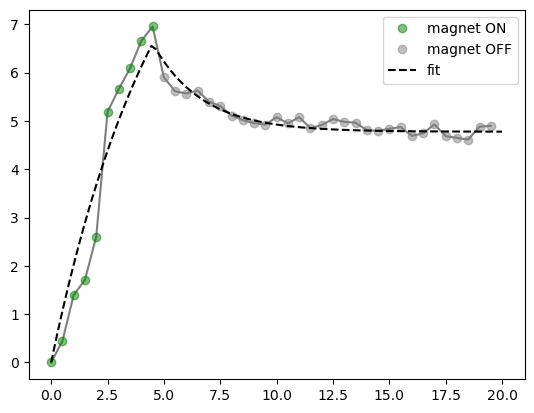

estimate of eta2:  420.43874643595154
k: 35.58923328775746 +/- 2.3660270359204985
eta_1: 28.26922372955499 +/- 4.997604764725436
eta_2: 6.362712813871104 +/- 0.8518179239447085
35.58923328775746 28.26922372955499 6.362712813871104
estimate of eta2:  55.114407944124125
k: 5.4479182400763255 +/- 1.1911837216859142
eta_1: 8.504528009689931 +/- 1.531239663706144
eta_2: 0.3438229328856841 +/- 0.020148131602359492
5.4479182400763255 8.504528009689931 0.3438229328856841


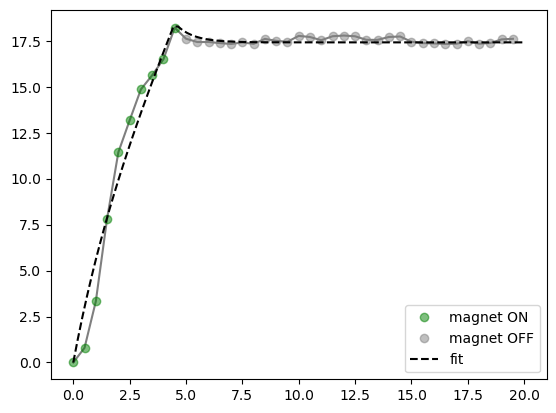

estimate of eta2:  72.33172072904227
k: 5.396402632080658 +/- 0.22198095019603253
eta_1: 2.485448720098858 +/- 0.38412820461984387
eta_2: 0.9547776809593773 +/- 0.035381854844488504
5.396402632080658 2.485448720098858 0.9547776809593773


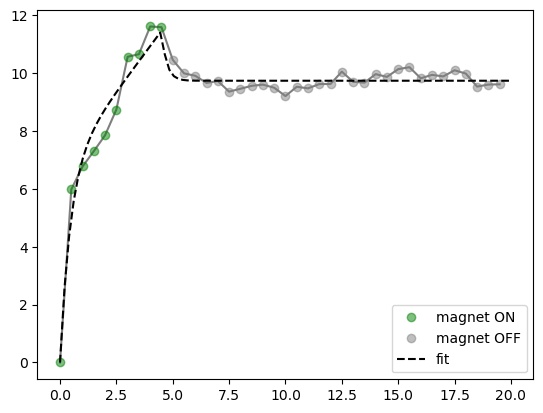

estimate of eta2:  67.75743455712528
k: 5.326431953750991 +/- 0.5847455074280238
eta_1: 17.67306319519415 +/- 1.5096586024327805
eta_2: 1.3470118662135862 +/- 0.08502568535485949
5.326431953750991 17.67306319519415 1.3470118662135862


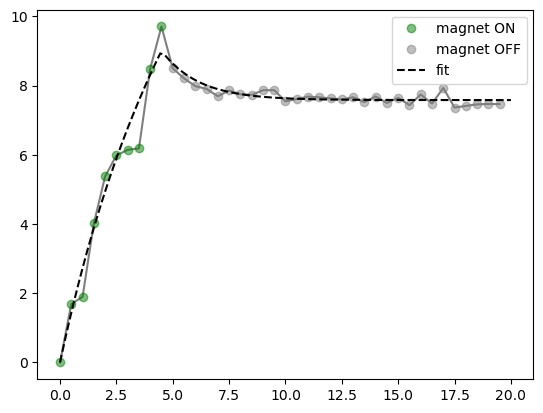

estimate of eta2:  75.62278591826204
k: 7.245693443176306 +/- 0.9309715625418672
eta_1: 7.6789871060997 +/- 0.915073048366015
eta_2: 0.29533062028857276 +/- 0.013464974481523373
7.245693443176306 7.6789871060997 0.29533062028857276


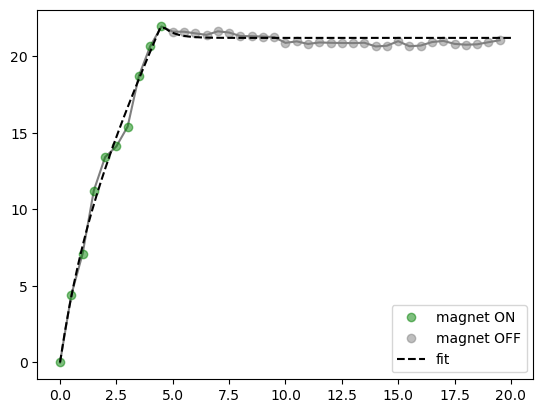

estimate of eta2:  159.25339175574646
k: 17.943888085167366 +/- 0.7839767580475212
eta_1: 42.91136206879949 +/- 3.1851472136806502
eta_2: 32.68126735265378 +/- 2.0667414861501654
17.943888085167366 42.91136206879949 32.68126735265378


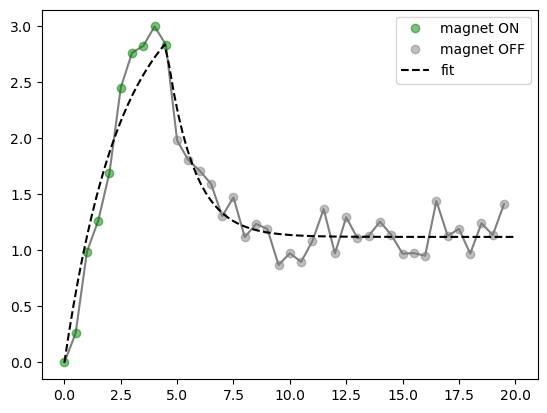

estimate of eta2:  201.0195993506423
k: 19.413963406664653 +/- 0.745848126760633
eta_1: 33.8584597382329 +/- 2.842425309735738
eta_2: 25.99347342956471 +/- 1.4434521441770578
19.413963406664653 33.8584597382329 25.99347342956471


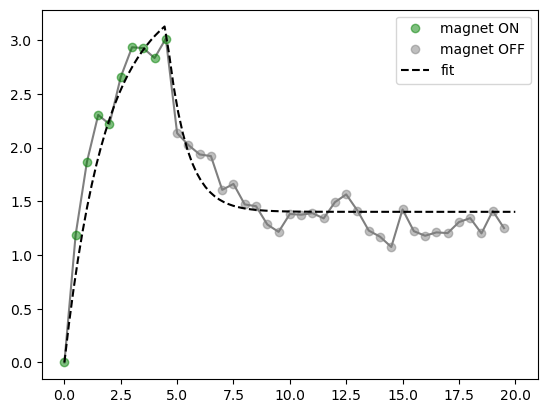

20240621_s02p02t02_2_5sON_15sOFF_spots
estimate of eta2:  115.46983682922681
k: 7.084390538834269 +/- 1.3036705757240652
eta_1: 20.168014167249872 +/- 2.324398735797069
eta_2: 0.7894057341912761 +/- 0.08495596181143535
7.084390538834269 20.168014167249872 0.7894057341912761


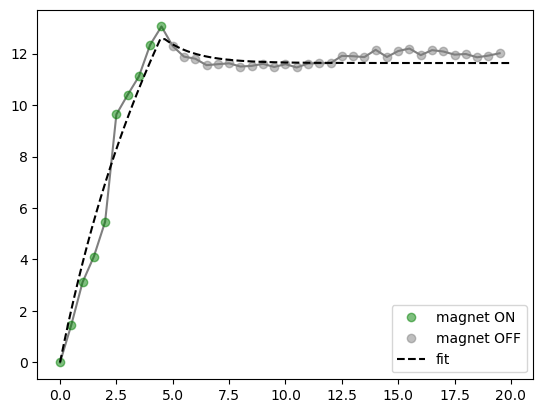

estimate of eta2:  208.14312486953847
k: 24.523875490829163 +/- 1.2889294649971996
eta_1: 71.69876803168938 +/- 5.816032386250411
eta_2: 177.70508743420353 +/- 32.644608641974806
24.523875490829163 71.69876803168938 177.70508743420353


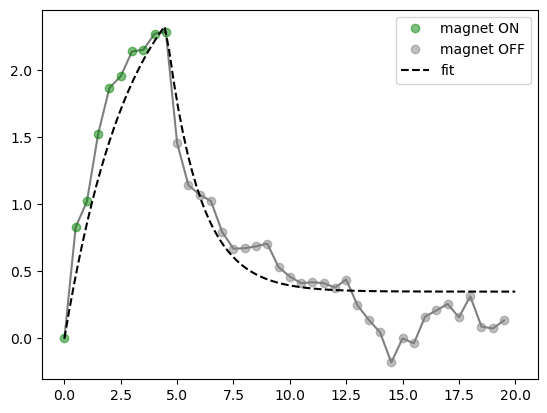

estimate of eta2:  269.8137049155799
k: 17.07978578477459 +/- 3.43733685994648
eta_1: 83.657284708998 +/- 9.36977769828645
eta_2: 5.36667975684823 +/- 0.7305078375681467
17.07978578477459 83.657284708998 5.36667975684823


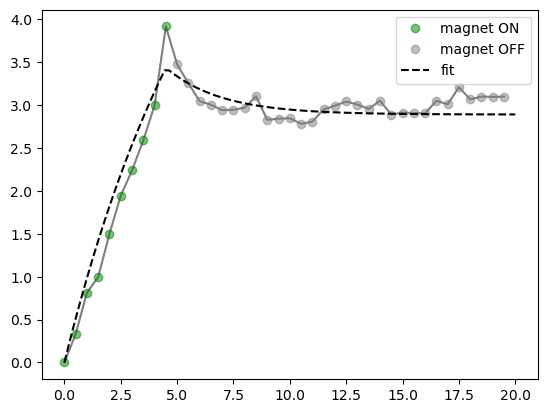

estimate of eta2:  133.95594948619353
k: 0.11865627820891454 +/- 0.901895398347698
eta_1: 35.27460540560189 +/- 11.04918980757609
eta_2: 1872574.5344075675 +/- 3133673773965.568
0.11865627820891454 35.27460540560189 1872574.5344075675


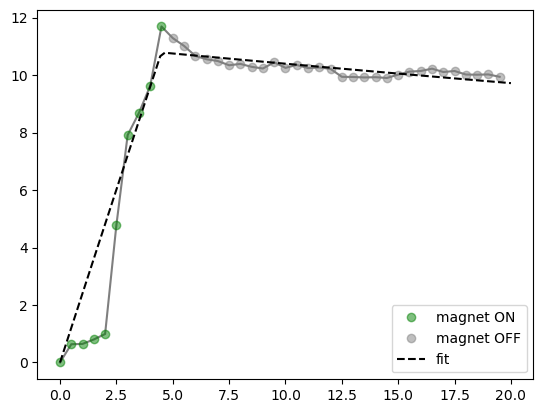

estimate of eta2:  252.4146314875049
k: 10.255729578919077 +/- 0.4000390448778041
eta_1: 11.986349338998354 +/- 0.8464347290031692
eta_2: 1.6249050880600917 +/- 0.11900189854658752
10.255729578919077 11.986349338998354 1.6249050880600917


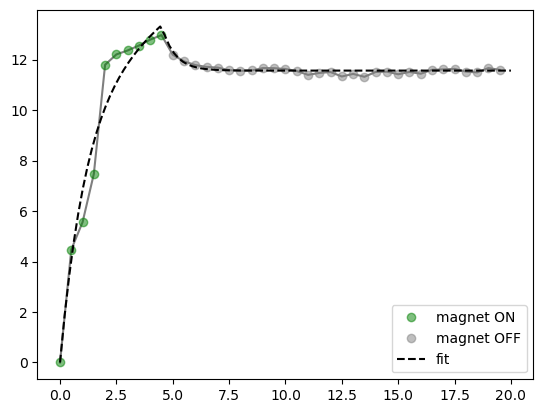

estimate of eta2:  452.35328557970234
k: 22.12758711323248 +/- 0.3467010689722803
eta_1: 9.758198438386957 +/- 0.7422785692254732
eta_2: 4.420698285108589 +/- 0.17551661133523766
22.12758711323248 9.758198438386957 4.420698285108589


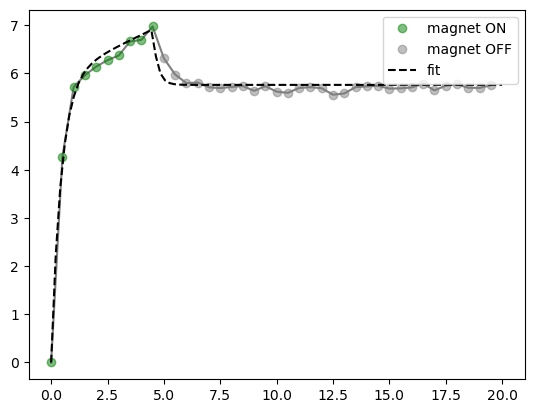

estimate of eta2:  488.0145948429241
k: 74.85795600154711 +/- 3.990934313801936
eta_1: 201.52084836831406 +/- 18.887805184882996
eta_2: 1239547512.7505922 +/- 3.532695796529841e-13
74.85795600154711 201.52084836831406 1239547512.7505922
estimate of eta2:  243.08292745692043
k: 0.1770452962861911 +/- 0.0880104352317268
eta_1: 59.38808255637453 +/- 1.2690037308310855
eta_2: 4507237.100255358 +/- 1.0162492109460505e-12
0.1770452962861911 59.38808255637453 4507237.100255358


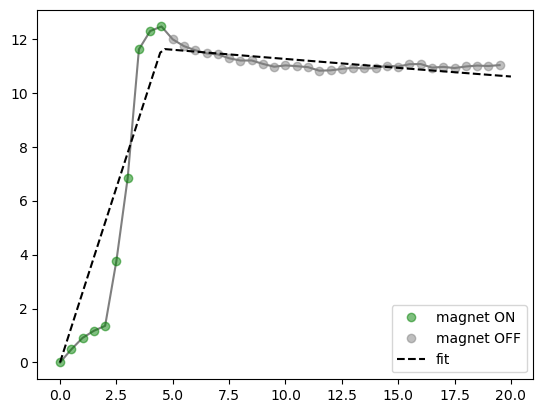

estimate of eta2:  140.72888102694404
k: 5.111779358468715 +/- 2.5136523378700617
eta_1: 32.72980545466897 +/- 6.049461396192471
eta_2: 1.131668594729554 +/- 0.3103047242404524
5.111779358468715 32.72980545466897 1.131668594729554
estimate of eta2:  132.93125234001548
k: 4.692322698174238 +/- 0.4370846830660522
eta_1: 21.37452492058189 +/- 1.1414025021881686
eta_2: 1.0794119805981415 +/- 0.08624545547443811
4.692322698174238 21.37452492058189 1.0794119805981415


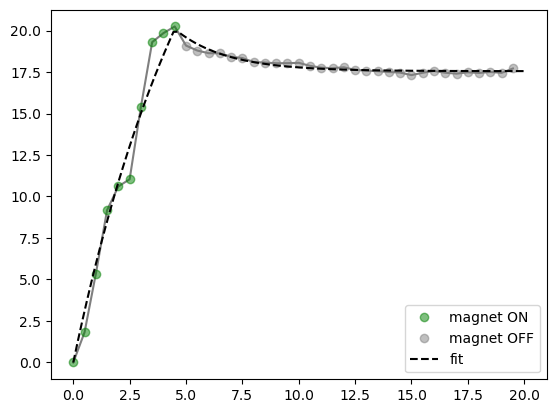

estimate of eta2:  806.1303044081616
k: 28.248388206178078 +/- 0.49516548049045855
eta_1: 6.608078298000018 +/- 0.9308801719659144
eta_2: 3.5088753397791783 +/- 0.16043666214340296
28.248388206178078 6.608078298000018 3.5088753397791783


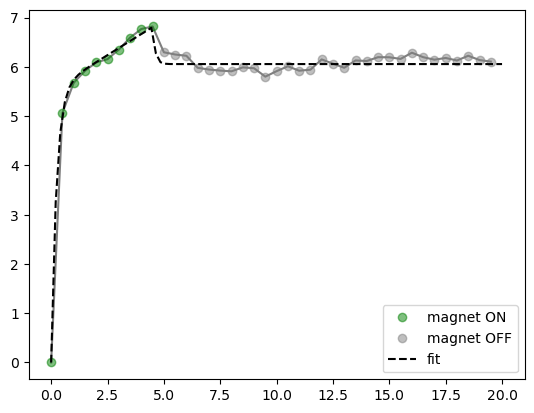

estimate of eta2:  1005.7508709653916
k: 353.9446419355061 +/- 100.66317670048961
eta_1: 255.1309358187859 +/- 242.46870329920364
eta_2: 489181063.06736666 +/- 84837316598873.88
353.9446419355061 255.1309358187859 489181063.06736666
estimate of eta2:  552.557084744738
k: 71.28259524472006 +/- 5.376934493340465
eta_1: 274.7735554781839 +/- 25.49690788266348
eta_2: 352.3293018496386 +/- 64.3738124908883
71.28259524472006 274.7735554781839 352.3293018496386
estimate of eta2:  494.1952919430912
k: 125.50701447729682 +/- 11.969266287872898
eta_1: 119.74646024496238 +/- 32.332332666257905
eta_2: 1198967016.7740564 +/- 482275415601047.8
125.50701447729682 119.74646024496238 1198967016.7740564
estimate of eta2:  644.4500266541844
k: 69.41569662720967 +/- 5.92277198445825
eta_1: 156.79949652786632 +/- 22.774680968422654
eta_2: 49.54880037136146 +/- 5.69124054976798
69.41569662720967 156.79949652786632 49.54880037136146
estimate of eta2:  619.810563538064
k: 50.061823247912045 +/- 0.891352108096

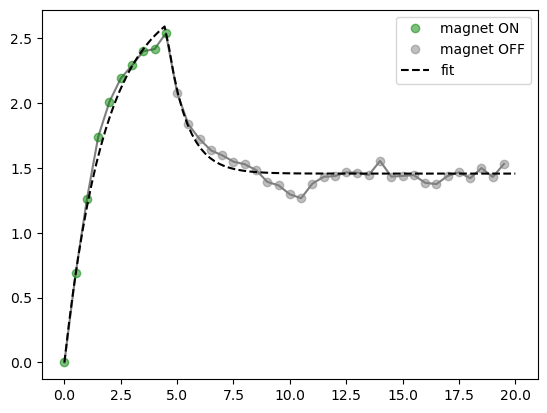

estimate of eta2:  633.7677519465494
k: 152.45744294728925 +/- 10.30209892162153
eta_1: 142.8052338413164 +/- 27.56221154078084
eta_2: 599625266.7498591 +/- 70245571075186.18
152.45744294728925 142.8052338413164 599625266.7498591
estimate of eta2:  460.25739869776123
k: 26.666332362168188 +/- 1.768552538426612
eta_1: 62.783592713342095 +/- 6.507746698163555
eta_2: 13.809994767675981 +/- 1.2686786789882414
26.666332362168188 62.783592713342095 13.809994767675981
estimate of eta2:  831.3408143264862
k: 33.600488633181584 +/- 3.6250613755600485
eta_1: 53.7187962943246 +/- 5.099053092165632
eta_2: 2.658780765982732 +/- 0.4694942577915893
33.600488633181584 53.7187962943246 2.658780765982732


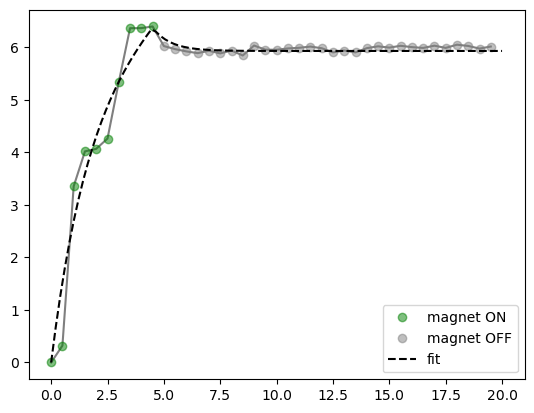

estimate of eta2:  2324.6956304639684


/Users/ursic/PhD/Projects/1_DataAnalysis_zebrafish/beads_in_zebrafish/magnetic_tweezers_SD/utils.py:520: RuntimeWarning: overflow encountered in exp
  x_2 = (F_0 / k * (1 - np.exp(-k * t_1 / eta_1)) + t_1 / eta_2) * (a * np.exp(-(t-t_1) * 2 * k / eta_1) + (1-a))


RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

In [14]:
folder = '/Volumes/cytokinesis-zebrafish-collab/magnetic_tweezers_SD/2_analysis/measurements_extended_info/'

samples = ['20240523_s02p01','20240621_s02p02', '20240705_s02p01']
sample_paths = []

df_results_jeff = pd.DataFrame(columns=['SAMPLE', 'TRACK_ID', 'PULSE_NUMBER', 'MT_STATUS', 'k', 'eta_1', 'eta_2', 'R_SQUARED'])

R2_min = 0.9 # cutoff for the weird fits

for idx in range(len(df_general_info)):
    filepath = df_general_info['trackmate_file'].values[idx]
    dt = df_general_info['time_interval (s)'].unique()[0]
    t_on = df_general_info['t_on (frame)'].unique()[0]
    t_off = df_general_info['t_off (frame)'].unique()[0]
    filename = os.path.basename(filepath).split('.')[0]
    for sample in samples:
        if filename.startswith(sample):
            print(filename)
            file_h5 = f'{filename}_extended.h5'
            comments = df_general_info['comments'].values[idx]

            df = pd.read_hdf(folder + file_h5, key='df')
            df = df.sort_values(by='POSITION_T')
        
            # plot curves
            
            for track_id in df['TRACK_ID'].unique():
                track = df[df['TRACK_ID']==track_id]
                track = track.dropna(subset=['CORRECTED DISPLACEMENT [um]'])
                for pulse_n in track['PULSE_NUMBER'].unique():
                    pulse = track[track['PULSE_NUMBER']==pulse_n]
                    time_on = pulse.loc[pulse['MAGNET_STATUS']==1, 'FRAME'].values * dt
                    time_off = pulse.loc[pulse['MAGNET_STATUS']==0, 'FRAME'].values * dt
                    time_off -= time_on[0]
                    time_on -= time_on[0]
                    time_data = list(time_on) + list(time_off)
                    
                    displacement_force_magnet_on = pulse.loc[pulse['MAGNET_STATUS']==1, 'CORRECTED DISPLACEMENT [um]'].values
                    displacement_force_magnet_off = pulse.loc[pulse['MAGNET_STATUS']==0, 'CORRECTED DISPLACEMENT [um]'].values
                    displacement_force_data = list(displacement_force_magnet_on) + list(displacement_force_magnet_off)

                    avg_force = np.average(pulse.loc[pulse['MAGNET_STATUS']==1, 'FORCE [pN]'].values)
                    # print('avg force:')
                    # print(avg_force)

                    t_1 = (t_on - 1) * dt
                    if displacement_force_data[(t_on)] > displacement_force_data[(t_on - 1)]:
                        t_1 = t_on * dt

                    sigma = np.ones_like(displacement_force_data)
                    window = 10
                    sigma[t_on - 1:t_on + window] = 0.5*np.ones(window+1)

                    time_fit = np.linspace(0, (t_on + t_off) * dt, 100)
                    displacement_force_fit, popt, pcov = get_fit_jeff_full(time_fit, time_data, displacement_force_data, avg_force, t_1, sigma)
                    params = ['k', 'eta_1', 'eta_2']
                    for i in range(len(popt)):
                        print(f"{params[i]}: {popt[i]} +/- {np.sqrt(pcov[i][i])}")

                    k, eta_1, eta_2 = popt
                    print(k, eta_1, eta_2)

                    yfit = jeff_full(np.array(time_data), k, eta_1, eta_2, avg_force, t_1)
                    R_sq = r_squared(np.array(displacement_force_data), np.array(yfit))
                    # print('R squared: ', R_sq)

                    new_line = {'SAMPLE': sample, 
                                'TRACK_ID': track_id, 
                                'PULSE_NUMBER': pulse_n, 
                                'MT_STATUS': pulse['MT_STATUS'].unique(), 
                                'k': k, 
                                'eta_1': eta_1, 
                                'eta_2': eta_2, 
                                # 'a': a, 
                                'R_SQUARED': R_sq}
                    
                    
                    df_results_jeff = pd.concat([df_results_jeff, pd.DataFrame(new_line, index=[0])], ignore_index=True)

                    if R_sq > R2_min:
                        pass
                        plt.plot(time_data, displacement_force_data, 'k-', alpha = 0.5)
                        plt.plot(time_on, displacement_force_magnet_on, 'o', color ='green', alpha=0.5, label = 'magnet ON')
                        plt.plot(time_off, displacement_force_magnet_off, 'o', color='gray', alpha=0.5, label = 'magnet OFF')

                        plt.plot(time_fit, displacement_force_fit, 'k--', label = 'fit')
                        plt.legend()
                        plt.show()


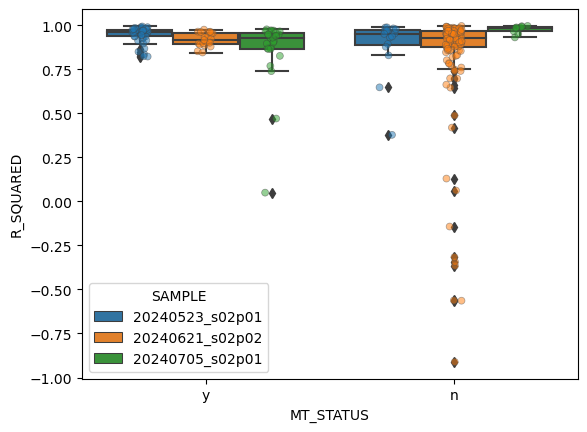

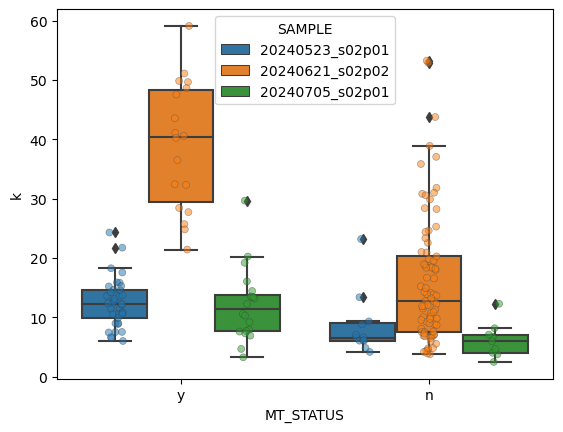

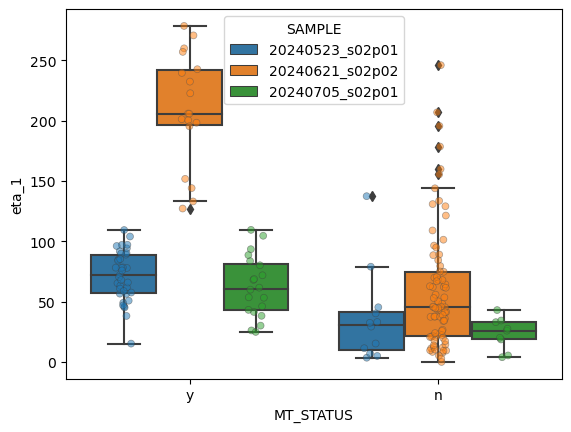

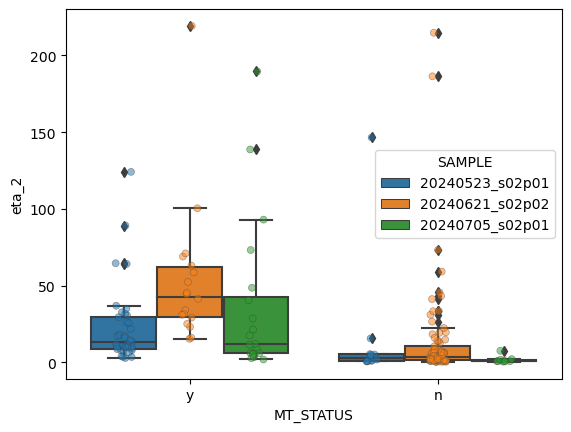

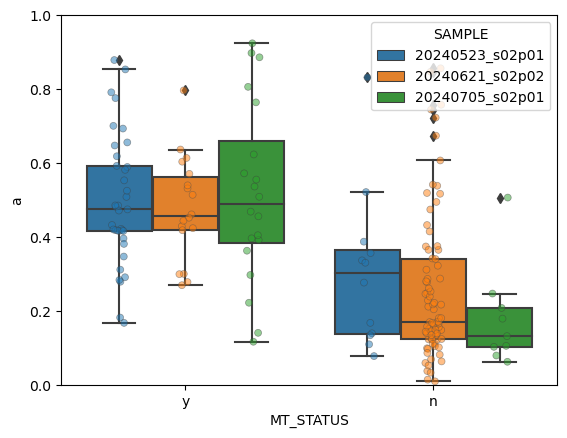

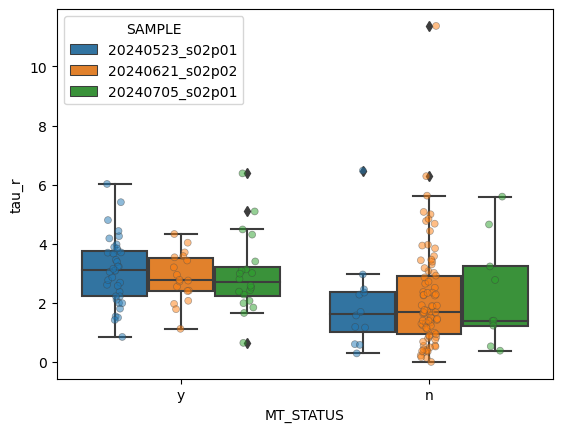

Total N = 244
Filtered N = 177


In [ ]:
R2_min = 0.85

df_results_jeff['a'] = 1 / (1 + df_results_jeff['k'] / (df_results_jeff['eta_2'] * (1 - np.exp(-df_results_jeff['k'] * t_1 / df_results_jeff['eta_1']))))


df_results_jeff['tau_r'] = df_results_jeff['eta_1']/(2* df_results_jeff['k'])


df_results_jeff_filtered = df_results_jeff[(df_results_jeff['a']<1)&(df_results_jeff['tau_r']<20)&(df_results_jeff['eta_2']<300)&(df_results_jeff['eta_1']<300)&(df_results_jeff['k']<80)&(df_results_jeff["R_SQUARED"]>R2_min)]


# Second subplot: Summary statistics
sns.boxplot(x='MT_STATUS', y='R_SQUARED', hue='SAMPLE', data=df_results_jeff)
sns.stripplot(x='MT_STATUS', y='R_SQUARED', hue='SAMPLE', dodge=True, data=df_results_jeff, jitter=True, alpha=0.5, linewidth=0.5, legend=False)
plt.show()


# Second subplot: Summary statistics
sns.boxplot(x='MT_STATUS', y='k', hue='SAMPLE', data=df_results_jeff_filtered)
sns.stripplot(x='MT_STATUS', y='k', hue='SAMPLE', dodge=True, data=df_results_jeff_filtered, jitter=True, alpha=0.5, linewidth=0.5, legend=False)
# plt.ylim(0, 100)
plt.show()

# boxplot
sns.boxplot(x='MT_STATUS', y='eta_1', hue='SAMPLE', data=df_results_jeff_filtered)
sns.stripplot(x='MT_STATUS', y='eta_1', hue='SAMPLE', dodge=True, data=df_results_jeff_filtered, jitter=True, alpha=0.5, linewidth=0.5, legend=False)
# plt.ylim(0, 500)
plt.show()

# boxplot
sns.boxplot(x='MT_STATUS', y='eta_2', hue='SAMPLE', data=df_results_jeff_filtered)
sns.stripplot(x='MT_STATUS', y='eta_2', hue='SAMPLE', dodge=True, data=df_results_jeff_filtered, jitter=True, alpha=0.5, linewidth=0.5, legend=False)
# plt.ylim(0, 100)
plt.show()

# boxplot
sns.boxplot(x='MT_STATUS', y='a', hue='SAMPLE', data=df_results_jeff_filtered)
sns.stripplot(x='MT_STATUS', y='a', hue='SAMPLE', dodge=True, data=df_results_jeff_filtered, jitter=True, alpha=0.5, linewidth=0.5, legend=False)
plt.ylim(0, 1)
plt.show()

# boxplot
sns.boxplot(x='MT_STATUS', y='tau_r', hue='SAMPLE', data=df_results_jeff_filtered)
sns.stripplot(x='MT_STATUS', y='tau_r', hue='SAMPLE', dodge=True, data=df_results_jeff_filtered, jitter=True, alpha=0.5, linewidth=0.5, legend=False)
# plt.ylim(0, 10)
plt.show()


print(f'Total N = {len(df_results_jeff)}')
print(f'Filtered N = {len(df_results_jeff_filtered)}')